### Importing libraries required for EDA

In [1]:
import pandas as pd
import numpy as np
import datetime
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from neuralprophet import NeuralProphet
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
from google.cloud.bigquery.client import Client
import os
warnings.filterwarnings("ignore")

In [2]:
import logging
logging.disable()

In [3]:
%load_ext google.cloud.bigquery

In [4]:
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = '/Users/razal/Downloads/empyrean-caster-197113-f3cf4ba0a8c0.json'

# "Will it snow tomorrow?" - The time traveler asked
The following dataset contains climate information form over 9000 stations accross the world. The overall goal of these subtasks will be to predict whether it will snow tomorrow 11 years ago. So if today is 2021.02.15 then the weather we want to forecast is for the date 2010.02.16. You are suppsed to solve the tasks using Big Query, which can be used in the Jupyter Notebook like it is shown in the following cell. For further information and how to used BigQuery in Jupyter Notebook refer to the Google Docs. 

The goal of this test is, to test your coding knowledge in Python, BigQuery and Pandas as well as your understanding of Data Science. If you get stuck at the first part, you can use the replacement data provided in the second part

In [5]:
%%bigquery 
SELECT
*,
FROM `bigquery-public-data.samples.gsod`
LIMIT 20 


Downloading: 100%|██████████| 20/20 [00:02<00:00,  8.63rows/s]


station_number  wban_number  year  month  day  mean_temp  \
0            38110        99999  1929     12   11  52.799999   
1            30750        99999  1930      1   13  37.200001   
2            36010        99999  1930     10    7  53.000000   
3            39800        99999  1931      9    2  52.599998   
4           726810        24131  1931      9   18  67.400002   
5           726810        24131  1931      5   30  72.800003   
6           726815        24106  1932      7   15  70.900002   
7           726815        24106  1932      5    6  53.599998   
8           726810        24131  1932     12   10   4.500000   
9           726815        24106  1932      9   29  62.099998   
10          726815        24106  1932      8    8  83.800003   
11          726815        24106  1932      4   25  55.599998   
12          726815        24106  1932      7   27  80.699997   
13          370310        99999  1933      8    9  69.800003   
14          284400        99999  1933      2   20   7.500000   
15          286610        99999  1933      4   11  38.299999   
16          239140        99999  1933      4   15  34.700001   
17          283670        99999  1933      3    1   1.800000   
18          349290        99999  1933     10    2  50.700001   
19          238490        99999  1933      4   25  36.799999   

    num_mean_temp_samples  mean_dew_point  num_mean_dew_point_samples  \
0                       4       48.500000                         4.0   
1                       4       34.500000                         4.0   
2                       4       51.299999                         4.0   
3                       5       51.000000                         4.0   
4                      24       40.599998                         8.0   
5                      24       33.000000                         6.0   
6                      24             NaN                         NaN   
7                      24             NaN                         NaN   
8                      24       -1.200000                         6.0   
9                      24             NaN                         NaN   
10                     24             NaN                         NaN   
11                     24             NaN                         NaN   
12                     24             NaN                         NaN   
13                      4             NaN                         NaN   
14                      4             NaN                         NaN   
15                      4             NaN                         NaN   
16                      4             NaN                         NaN   
17                      4             NaN                         NaN   
18                      4             NaN                         NaN   
19                      4             NaN                         NaN   

    mean_sealevel_pressure  ...  min_temperature  min_temperature_explicit  \
0                      NaN  ...              NaN                      None   
1                      NaN  ...              NaN                      None   
2                      NaN  ...              NaN                      None   
3                      NaN  ...              NaN                      None   
4                      NaN  ...              NaN                      None   
5                      NaN  ...              NaN                      None   
6                      NaN  ...              NaN                      None   
7                      NaN  ...              NaN                      None   
8                      NaN  ...              NaN                      None   
9                      NaN  ...              NaN                      None   
10                     NaN  ...              NaN                      None   
11                     NaN  ...              NaN                      None   
12                     NaN  ...              NaN                      None   
13                     NaN  ...  

## Part 1

### 1. Task
Change the date format to 'YYYY-MM-DD' and select the data from 2005 till 2010 for station numbers including and between 725300 and 726300 , and save it as a pandas dataframe. Note the maximum year available is 2010. 

In [6]:
from google.cloud import bigquery

bqclient = bigquery.Client()

query_string = """
SELECT
PARSE_DATE('%m/%d/%Y', Concat (month,"/",day,"/",year)) as date,
*,
FROM `bigquery-public-data.samples.gsod`
where year between 2005 and 2010 and station_number between 725300 and 726300 order by date
"""

task_1_df = (
    bqclient.query(query_string)
    .result()
    .to_dataframe(
        create_bqstorage_client=True,
    )
)
print(task_1_df.shape)

(399713, 32)


In [7]:
task_1_df.head()

date  station_number  wban_number  year  month  day  mean_temp  \
0  2005-01-01          725520        14935  2005      1    1  27.700001   
1  2005-01-01          726060        14764  2005      1    1  43.500000   
2  2005-01-01          726163        99999  2005      1    1  41.700001   
3  2005-01-01          725300        94846  2005      1    1  32.099998   
4  2005-01-01          725835        99999  2005      1    1  28.400000   

   num_mean_temp_samples  mean_dew_point  num_mean_dew_point_samples  ...  \
0                     24       18.700001                        24.0  ...   
1                     24       34.400002                        24.0  ...   
2                     24       31.299999                        24.0  ...   
3                     24       21.200001                        24.0  ...   
4                      4       24.299999                         4.0  ...   

   min_temperature  min_temperature_explicit  total_precipitation  snow_depth  \
0              NaN                      None                 0.01         NaN   
1              NaN                      None                 0.01         NaN   
2              NaN                      None                 0.08         NaN   
3              NaN                      None                 0.00         NaN   
4              NaN                      None                 0.09         7.1   

     fog   rain   snow   hail  thunder  tornado  
0   True   True   True   True     True     True  
1  False  False  False  False    False    False  
2  False  False  False  False    False    False  
3  False  False  False  False    False    False  
4  False  False  False  False    False    False  

[5 rows x 32 columns]

### 2. Task 
From here want to work with the data from all stations 725300 to 725330 that have information from 2005 till 2010. 

In [8]:
query_string = """
SELECT
PARSE_DATE('%m/%d/%Y', Concat (month,"/",day,"/",year)) as date,
*,
FROM `bigquery-public-data.samples.gsod`
where year between 2005 and 2010 and station_number between 725300 and 725330 order by date
"""

task_2_df = (
    bqclient.query(query_string)
    .result()
    .to_dataframe(
        create_bqstorage_client=True,
    )
)
print(task_2_df.shape)

(19189, 32)


In [9]:
task_2_df.head()

date  station_number  wban_number  year  month  day  mean_temp  \
0  2005-01-01          725300        94846  2005      1    1  32.099998   
1  2005-01-01          725315        99999  2005      1    1  39.000000   
2  2005-01-01          725305        99999  2005      1    1  30.900000   
3  2005-01-01          725320        14842  2005      1    1  35.299999   
4  2005-01-01          725326        99999  2005      1    1  29.400000   

   num_mean_temp_samples  mean_dew_point  num_mean_dew_point_samples  ...  \
0                     24       21.200001                        24.0  ...   
1                     24       34.299999                        24.0  ...   
2                     24       21.799999                        24.0  ...   
3                     24       26.700001                        24.0  ...   
4                     24       20.100000                        24.0  ...   

   min_temperature  min_temperature_explicit  total_precipitation  snow_depth  \
0              NaN                      None                 0.00         NaN   
1              NaN                      None                 0.03         NaN   
2              NaN                      None                 0.00         NaN   
3              NaN                      None                 0.38         NaN   
4              NaN                      None                 0.00         NaN   

     fog   rain   snow   hail  thunder  tornado  
0  False  False  False  False    False    False  
1   True   True   True   True     True     True  
2  False  False  False  False    False    False  
3   True   True   True   True     True     True  
4  False  False  False  False    False    False  

[5 rows x 32 columns]

Do a first analysis of the remaining dataset, clean or drop data depending on how you see appropriate. 

 ### Identifying the the columns with missing records and dropping columns with more than 10% of missing records

In [10]:
missing_details_df=pd.DataFrame(data=task_2_df.isna().sum(), columns =['missing_records']).reset_index()
missing_details_df['perc_missing']=missing_details_df['missing_records']/task_2_df.shape[0]
col_filt_list=missing_details_df[missing_details_df['perc_missing']<0.10]['index'].unique().tolist()
task_2_df_new=task_2_df[col_filt_list]

### Identifying missing records by station

In [11]:
station_agg=task_2_df_new.groupby(['station_number']).agg({'date':'nunique'}).reset_index()
station_agg['records_unique']=task_2_df_new['date'].nunique()
station_agg['records_missing']=station_agg['records_unique']-station_agg['date']
station_agg

station_number  date  records_unique  records_missing
0          725300  1928            1930                2
1          725305  1930            1930                0
2          725314  1906            1930               24
3          725315  1930            1930                0
4          725316  1930            1930                0
5          725317  1928            1930                2
6          725320  1930            1930                0
7          725326  1891            1930               39
8          725327  1887            1930               43
9          725330  1929            1930                1

### Creating the missed records for each station

In [12]:
# get distinct dates
col_list=task_2_df_new.columns.tolist()
missing_rows=station_agg.records_missing.sum()

df = pd.DataFrame()
date_list=task_2_df_new['date'].astype(str).unique().tolist()


for station in task_2_df_new['station_number'].unique().tolist():
    sub_data=task_2_df_new[task_2_df_new['station_number']==station]
    date_sub_list=sub_data['date'].astype(str).unique().tolist()
    list_filt=list(set(date_list) - set(date_sub_list))
    for i in list_filt:
        df=df.append({'date': i,'station_number': station},ignore_index=True)

concat_df=pd.concat([df,task_2_df_new])       
concat_df['date']=pd.to_datetime(concat_df['date'])

### Filling in the missing values for the created records'  columns using forwards fill method after sorting the dataframe by station and date

In [13]:
concat_df.sort_values(['station_number', 'date'], ascending=[True, True], inplace=True)
concat_df=concat_df.ffill()

### Creation of correlation matrix for all columns

<AxesSubplot:>

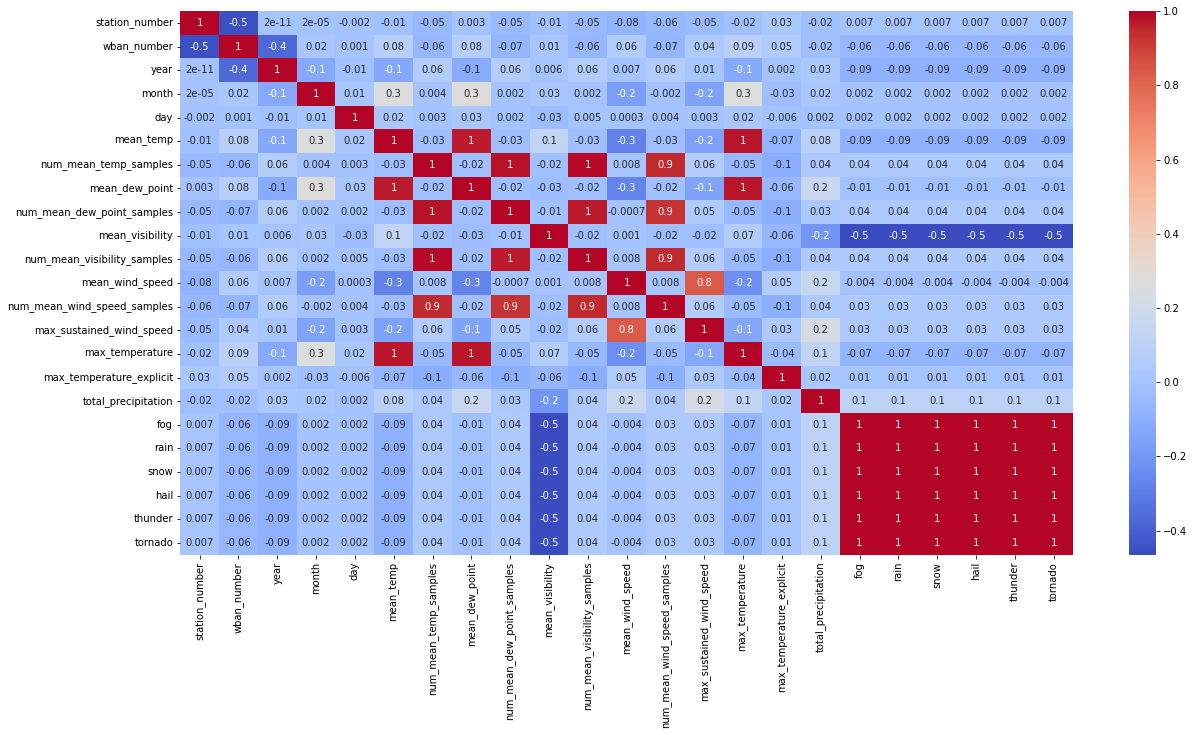

In [14]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(concat_df.corr(method='pearson'), annot = True, fmt='.1g',cmap= 'coolwarm',ax=ax)

### Refering to the figure above, drop columns that have correlation of 100% against the target variable "snow"

In [15]:
concat_df.drop(columns=['fog','rain','thunder','tornado','hail'],inplace=True)

### 3. Task
Now it is time to split the data, into a training, evaluation and test set. As a reminder, the date we are trying to predict snow fall for is the following, and hence should constitute your test set.

In [16]:
date_11_years_ago=str(datetime.datetime.today()- datetime.timedelta(days=11*365)).split(' ')[0]

In [17]:
date_11_years_ago

'2011-07-30'

In [18]:
concat_df.date.max()

Timestamp('2010-04-16 00:00:00')

### Generating X-Data beyond "2010-04-16"

The forecast date is "2011-07-29". But the maximum date for all stations is "2010-04-16". 
I will need to forecast all the continuous variables for time period beyond "2010-04-16" as there is no X-Data available to predict.
I chose only specific columns to be forecasted which are not redundant, for eg: I didn't chose the columns like num_mean_dew_point_samples that indicated the number of samples that was used to calculated mean values. I also didn't chose columns like "max_temperature" and "mean_temp" because as per the plot above, these two columns are highly correlated against the column "mean_dew_point"

In [19]:
"""Getting unique list of stations"""

station_list=concat_df.station_number.unique().tolist()

"""Getting only important continuous variables that is needed to prepare X-Data beyond 2010-04-16 """

concat_df_sub=concat_df[['date','station_number','mean_dew_point','mean_visibility','mean_wind_speed','max_sustained_wind_speed','total_precipitation']]
col_pred_list=['mean_dew_point','mean_visibility','mean_wind_speed','max_sustained_wind_speed','total_precipitation']


Station: 725300.0 column: mean_dew_point


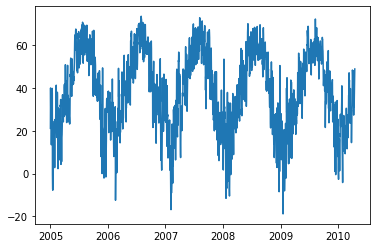

Station: 725300.0 column: mean_visibility


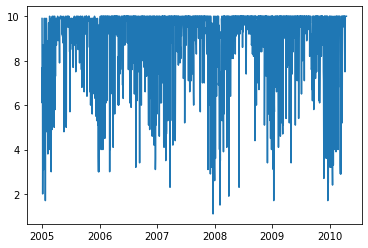

Station: 725300.0 column: mean_wind_speed


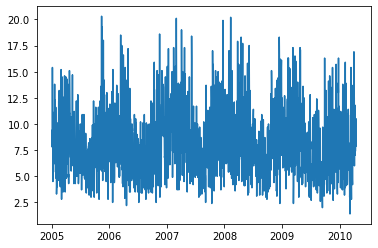

Station: 725300.0 column: max_sustained_wind_speed


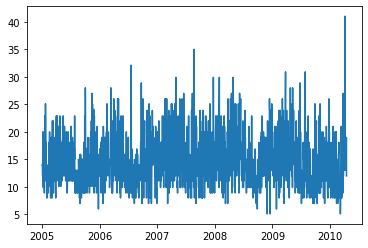

Station: 725300.0 column: total_precipitation


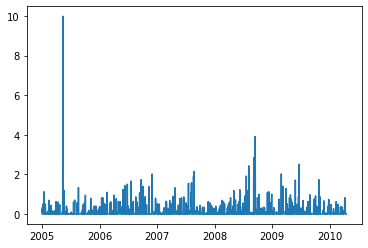

Station: 725305.0 column: mean_dew_point


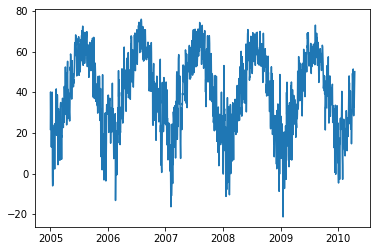

Station: 725305.0 column: mean_visibility


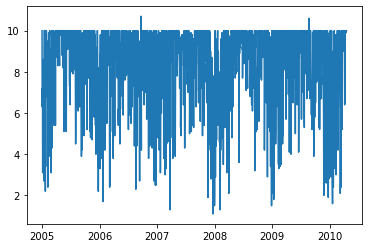

Station: 725305.0 column: mean_wind_speed


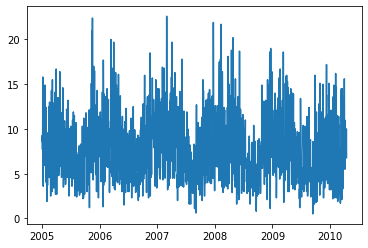

Station: 725305.0 column: max_sustained_wind_speed


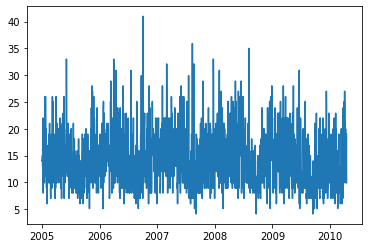

Station: 725305.0 column: total_precipitation


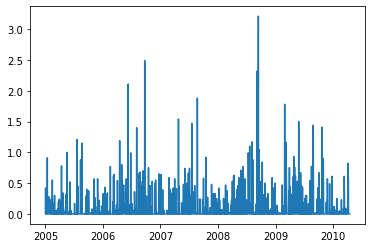

Station: 725314.0 column: mean_dew_point


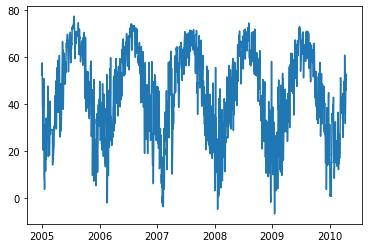

Station: 725314.0 column: mean_visibility


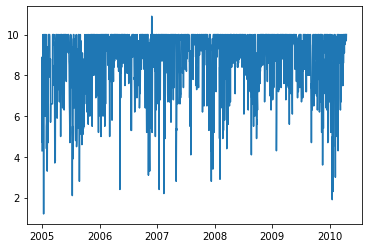

Station: 725314.0 column: mean_wind_speed


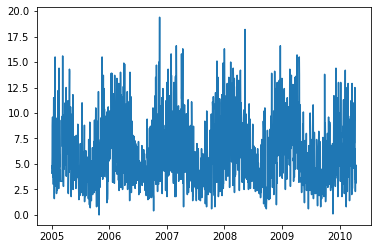

Station: 725314.0 column: max_sustained_wind_speed


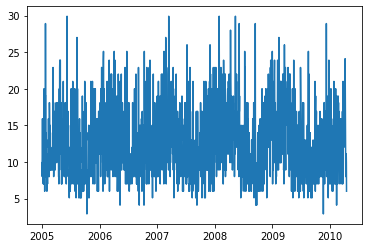

Station: 725314.0 column: total_precipitation


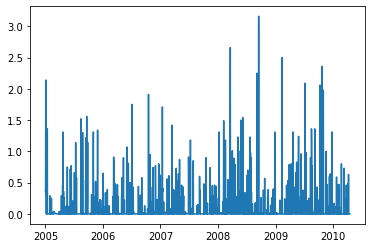

Station: 725315.0 column: mean_dew_point


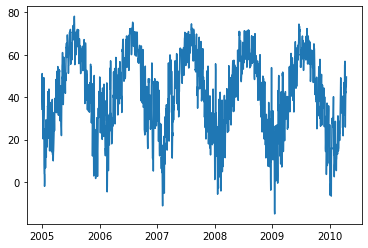

Station: 725315.0 column: mean_visibility


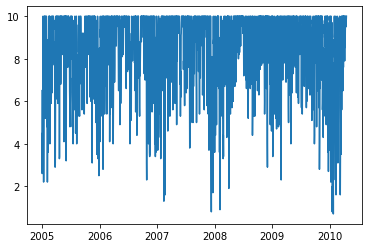

Station: 725315.0 column: mean_wind_speed


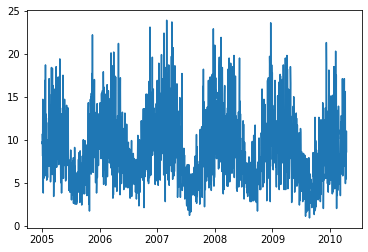

Station: 725315.0 column: max_sustained_wind_speed


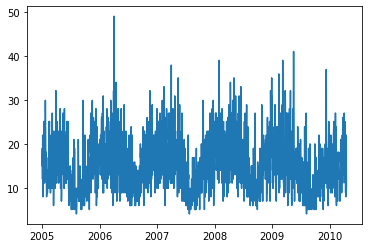

Station: 725315.0 column: total_precipitation


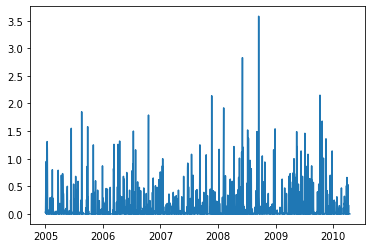

Station: 725316.0 column: mean_dew_point


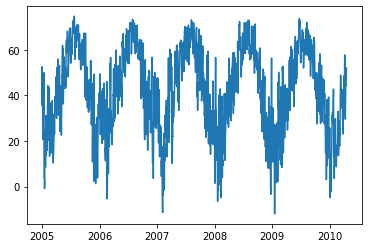

Station: 725316.0 column: mean_visibility


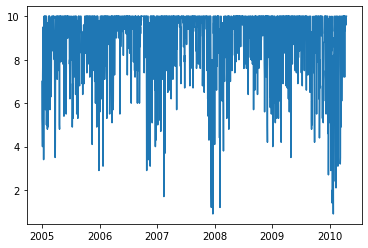

Station: 725316.0 column: mean_wind_speed


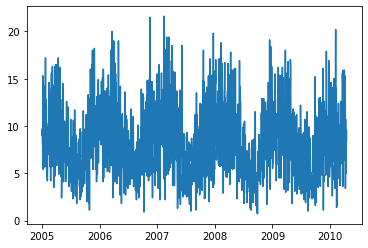

Station: 725316.0 column: max_sustained_wind_speed


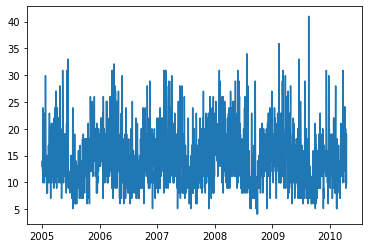

Station: 725316.0 column: total_precipitation


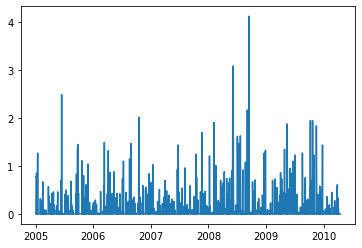

Station: 725317.0 column: mean_dew_point


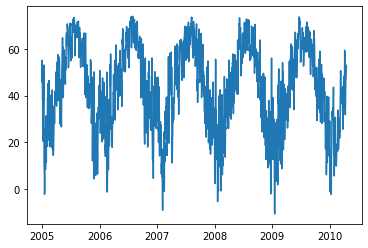

Station: 725317.0 column: mean_visibility


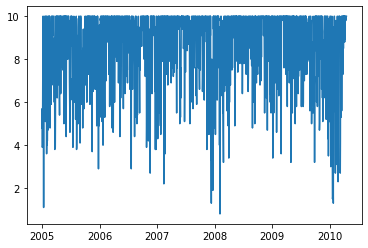

Station: 725317.0 column: mean_wind_speed


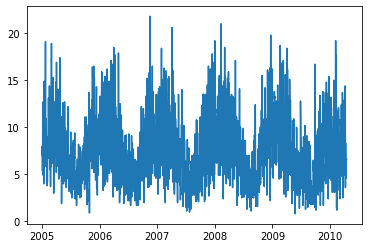

Station: 725317.0 column: max_sustained_wind_speed


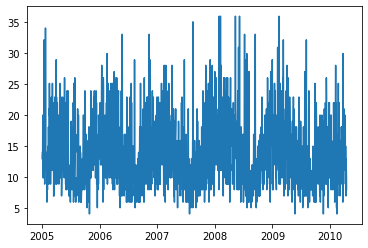

Station: 725317.0 column: total_precipitation


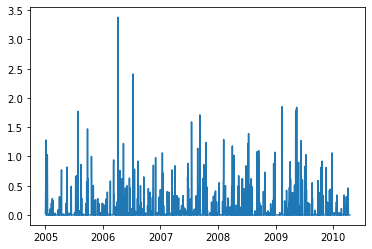

Station: 725320.0 column: mean_dew_point


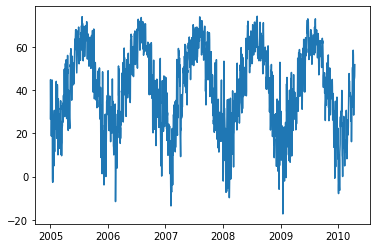

Station: 725320.0 column: mean_visibility


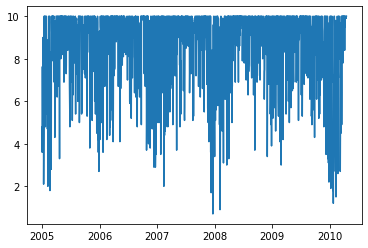

Station: 725320.0 column: mean_wind_speed


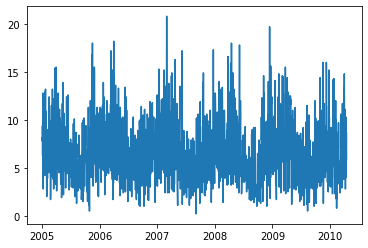

Station: 725320.0 column: max_sustained_wind_speed


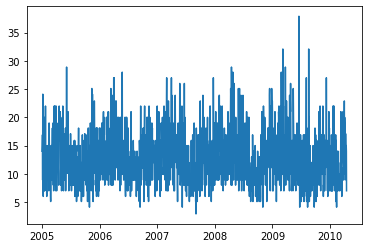

Station: 725320.0 column: total_precipitation


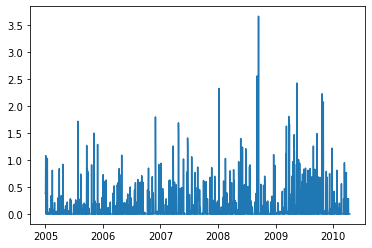

Station: 725326.0 column: mean_dew_point


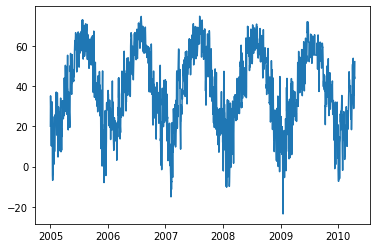

Station: 725326.0 column: mean_visibility


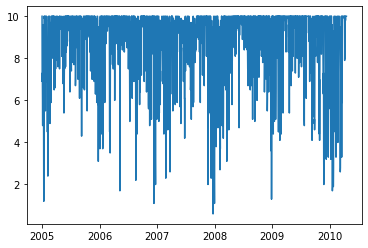

Station: 725326.0 column: mean_wind_speed


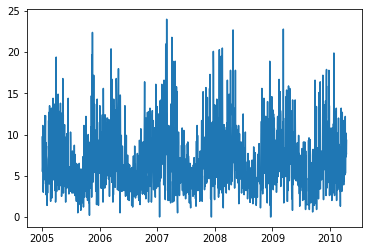

Station: 725326.0 column: max_sustained_wind_speed


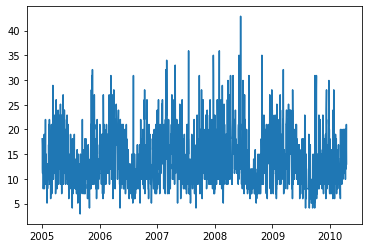

Station: 725326.0 column: total_precipitation


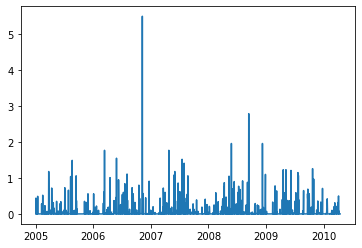

Station: 725327.0 column: mean_dew_point


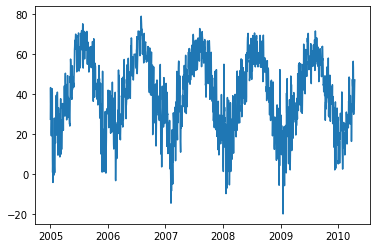

Station: 725327.0 column: mean_visibility


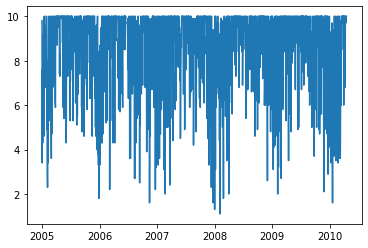

Station: 725327.0 column: mean_wind_speed


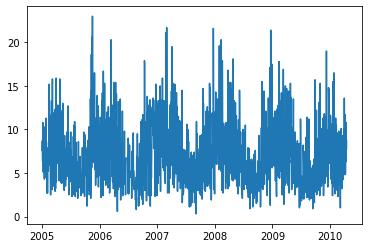

Station: 725327.0 column: max_sustained_wind_speed


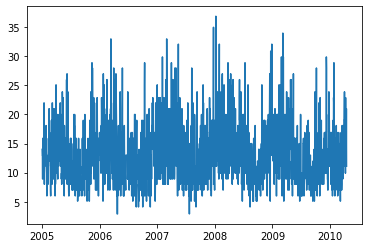

Station: 725327.0 column: total_precipitation


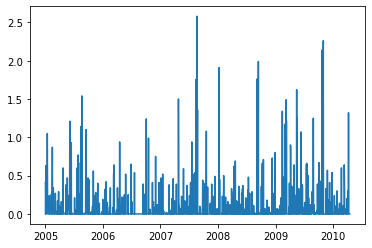

Station: 725330.0 column: mean_dew_point


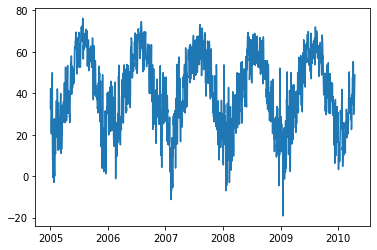

Station: 725330.0 column: mean_visibility


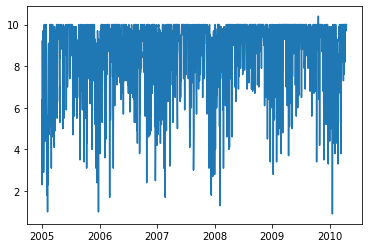

Station: 725330.0 column: mean_wind_speed


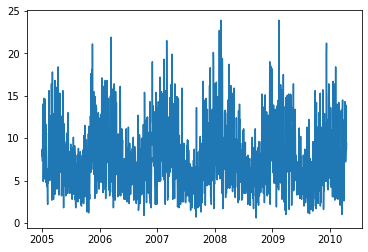

Station: 725330.0 column: max_sustained_wind_speed


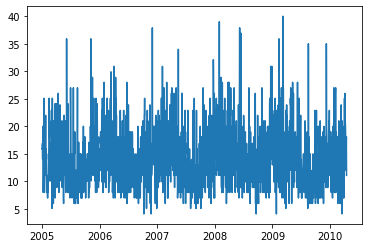

Station: 725330.0 column: total_precipitation


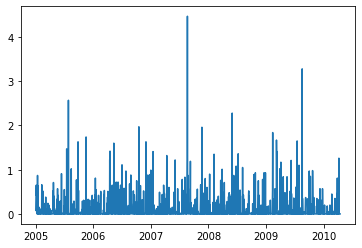

In [20]:
"""In a loop for each station trying to understand the pattern of every chosen continuous variable"""
for station in station_list:
    for col in col_pred_list:
        station_filt=concat_df_sub[concat_df_sub['station_number']==station]
        print("Station:",station,"column:",col)
        plt.plot(station_filt ['date'], station_filt [col])
        plt.show()

### Predicting all continuous variables for each station using NeuralProphet 

Below loop will run for 50 combinations of station & continuous variable column

1 Station: 725300.0 ---- Column Name: mean_dew_point


  0%|          | 0/132 [00:00<?, ?it/s]

  0%|          | 0/132 [00:00<?, ?it/s]

  0%|          | 0/132 [00:00<?, ?it/s]

2 Station: 725300.0 ---- Column Name: mean_visibility


  0%|          | 0/132 [00:00<?, ?it/s]

  0%|          | 0/132 [00:00<?, ?it/s]

3 Station: 725300.0 ---- Column Name: mean_wind_speed


  0%|          | 0/132 [00:00<?, ?it/s]

  0%|          | 0/132 [00:00<?, ?it/s]

4 Station: 725300.0 ---- Column Name: max_sustained_wind_speed


  0%|          | 0/132 [00:00<?, ?it/s]

  0%|          | 0/132 [00:00<?, ?it/s]

5 Station: 725300.0 ---- Column Name: total_precipitation


  0%|          | 0/132 [00:00<?, ?it/s]

  0%|          | 0/132 [00:00<?, ?it/s]

6 Station: 725305.0 ---- Column Name: mean_dew_point


  0%|          | 0/132 [00:00<?, ?it/s]

  0%|          | 0/132 [00:00<?, ?it/s]

7 Station: 725305.0 ---- Column Name: mean_visibility


  0%|          | 0/132 [00:00<?, ?it/s]

  0%|          | 0/132 [00:00<?, ?it/s]

8 Station: 725305.0 ---- Column Name: mean_wind_speed


  0%|          | 0/132 [00:00<?, ?it/s]

  0%|          | 0/132 [00:00<?, ?it/s]

9 Station: 725305.0 ---- Column Name: max_sustained_wind_speed


  0%|          | 0/132 [00:00<?, ?it/s]

  0%|          | 0/132 [00:00<?, ?it/s]

10 Station: 725305.0 ---- Column Name: total_precipitation


  0%|          | 0/132 [00:00<?, ?it/s]

  0%|          | 0/132 [00:00<?, ?it/s]

11 Station: 725314.0 ---- Column Name: mean_dew_point


  0%|          | 0/132 [00:00<?, ?it/s]

  0%|          | 0/132 [00:00<?, ?it/s]

12 Station: 725314.0 ---- Column Name: mean_visibility


  0%|          | 0/132 [00:00<?, ?it/s]

  0%|          | 0/132 [00:00<?, ?it/s]

13 Station: 725314.0 ---- Column Name: mean_wind_speed


  0%|          | 0/132 [00:00<?, ?it/s]

  0%|          | 0/132 [00:00<?, ?it/s]

14 Station: 725314.0 ---- Column Name: max_sustained_wind_speed


  0%|          | 0/132 [00:00<?, ?it/s]

  0%|          | 0/132 [00:00<?, ?it/s]

15 Station: 725314.0 ---- Column Name: total_precipitation


  0%|          | 0/132 [00:00<?, ?it/s]

  0%|          | 0/132 [00:00<?, ?it/s]

16 Station: 725315.0 ---- Column Name: mean_dew_point


  0%|          | 0/132 [00:00<?, ?it/s]

  0%|          | 0/132 [00:00<?, ?it/s]

17 Station: 725315.0 ---- Column Name: mean_visibility


  0%|          | 0/132 [00:00<?, ?it/s]

  0%|          | 0/132 [00:00<?, ?it/s]

18 Station: 725315.0 ---- Column Name: mean_wind_speed


  0%|          | 0/132 [00:00<?, ?it/s]

  0%|          | 0/132 [00:00<?, ?it/s]

19 Station: 725315.0 ---- Column Name: max_sustained_wind_speed


  0%|          | 0/132 [00:00<?, ?it/s]

  0%|          | 0/132 [00:00<?, ?it/s]

20 Station: 725315.0 ---- Column Name: total_precipitation


  0%|          | 0/132 [00:00<?, ?it/s]

  0%|          | 0/132 [00:00<?, ?it/s]

21 Station: 725316.0 ---- Column Name: mean_dew_point


  0%|          | 0/132 [00:00<?, ?it/s]

  0%|          | 0/132 [00:00<?, ?it/s]

22 Station: 725316.0 ---- Column Name: mean_visibility


  0%|          | 0/132 [00:00<?, ?it/s]

  0%|          | 0/132 [00:00<?, ?it/s]

23 Station: 725316.0 ---- Column Name: mean_wind_speed


  0%|          | 0/132 [00:00<?, ?it/s]

  0%|          | 0/132 [00:00<?, ?it/s]

24 Station: 725316.0 ---- Column Name: max_sustained_wind_speed


  0%|          | 0/132 [00:00<?, ?it/s]

  0%|          | 0/132 [00:00<?, ?it/s]

25 Station: 725316.0 ---- Column Name: total_precipitation


  0%|          | 0/132 [00:00<?, ?it/s]

  0%|          | 0/132 [00:00<?, ?it/s]

26 Station: 725317.0 ---- Column Name: mean_dew_point


  0%|          | 0/132 [00:00<?, ?it/s]

  0%|          | 0/132 [00:00<?, ?it/s]

27 Station: 725317.0 ---- Column Name: mean_visibility


  0%|          | 0/132 [00:00<?, ?it/s]

  0%|          | 0/132 [00:00<?, ?it/s]

28 Station: 725317.0 ---- Column Name: mean_wind_speed


  0%|          | 0/132 [00:00<?, ?it/s]

  0%|          | 0/132 [00:00<?, ?it/s]

29 Station: 725317.0 ---- Column Name: max_sustained_wind_speed


  0%|          | 0/132 [00:00<?, ?it/s]

  0%|          | 0/132 [00:00<?, ?it/s]

30 Station: 725317.0 ---- Column Name: total_precipitation


  0%|          | 0/132 [00:00<?, ?it/s]

  0%|          | 0/132 [00:00<?, ?it/s]

31 Station: 725320.0 ---- Column Name: mean_dew_point


  0%|          | 0/132 [00:00<?, ?it/s]

  0%|          | 0/132 [00:00<?, ?it/s]

32 Station: 725320.0 ---- Column Name: mean_visibility


  0%|          | 0/132 [00:00<?, ?it/s]

  0%|          | 0/132 [00:00<?, ?it/s]

33 Station: 725320.0 ---- Column Name: mean_wind_speed


  0%|          | 0/132 [00:00<?, ?it/s]

  0%|          | 0/132 [00:00<?, ?it/s]

34 Station: 725320.0 ---- Column Name: max_sustained_wind_speed


  0%|          | 0/132 [00:00<?, ?it/s]

  0%|          | 0/132 [00:00<?, ?it/s]

35 Station: 725320.0 ---- Column Name: total_precipitation


  0%|          | 0/132 [00:00<?, ?it/s]

  0%|          | 0/132 [00:00<?, ?it/s]

36 Station: 725326.0 ---- Column Name: mean_dew_point


  0%|          | 0/132 [00:00<?, ?it/s]

  0%|          | 0/132 [00:00<?, ?it/s]

37 Station: 725326.0 ---- Column Name: mean_visibility


  0%|          | 0/132 [00:00<?, ?it/s]

  0%|          | 0/132 [00:00<?, ?it/s]

38 Station: 725326.0 ---- Column Name: mean_wind_speed


  0%|          | 0/132 [00:00<?, ?it/s]

  0%|          | 0/132 [00:00<?, ?it/s]

39 Station: 725326.0 ---- Column Name: max_sustained_wind_speed


  0%|          | 0/132 [00:00<?, ?it/s]

  0%|          | 0/132 [00:00<?, ?it/s]

40 Station: 725326.0 ---- Column Name: total_precipitation


  0%|          | 0/132 [00:00<?, ?it/s]

  0%|          | 0/132 [00:00<?, ?it/s]

41 Station: 725327.0 ---- Column Name: mean_dew_point


  0%|          | 0/132 [00:00<?, ?it/s]

  0%|          | 0/132 [00:00<?, ?it/s]

42 Station: 725327.0 ---- Column Name: mean_visibility


  0%|          | 0/132 [00:00<?, ?it/s]

  0%|          | 0/132 [00:00<?, ?it/s]

43 Station: 725327.0 ---- Column Name: mean_wind_speed


  0%|          | 0/132 [00:00<?, ?it/s]

  0%|          | 0/132 [00:00<?, ?it/s]

44 Station: 725327.0 ---- Column Name: max_sustained_wind_speed


  0%|          | 0/132 [00:00<?, ?it/s]

  0%|          | 0/132 [00:00<?, ?it/s]

45 Station: 725327.0 ---- Column Name: total_precipitation


  0%|          | 0/132 [00:00<?, ?it/s]

  0%|          | 0/132 [00:00<?, ?it/s]

46 Station: 725330.0 ---- Column Name: mean_dew_point


  0%|          | 0/132 [00:00<?, ?it/s]

47 Station: 725330.0 ---- Column Name: mean_visibility


  0%|          | 0/132 [00:00<?, ?it/s]

  0%|          | 0/132 [00:00<?, ?it/s]

  0%|          | 0/132 [00:00<?, ?it/s]

48 Station: 725330.0 ---- Column Name: mean_wind_speed


  0%|          | 0/132 [00:00<?, ?it/s]

49 Station: 725330.0 ---- Column Name: max_sustained_wind_speed


  0%|          | 0/132 [00:00<?, ?it/s]

  0%|          | 0/132 [00:00<?, ?it/s]

  0%|          | 0/132 [00:00<?, ?it/s]

50 Station: 725330.0 ---- Column Name: total_precipitation


  0%|          | 0/132 [00:00<?, ?it/s]

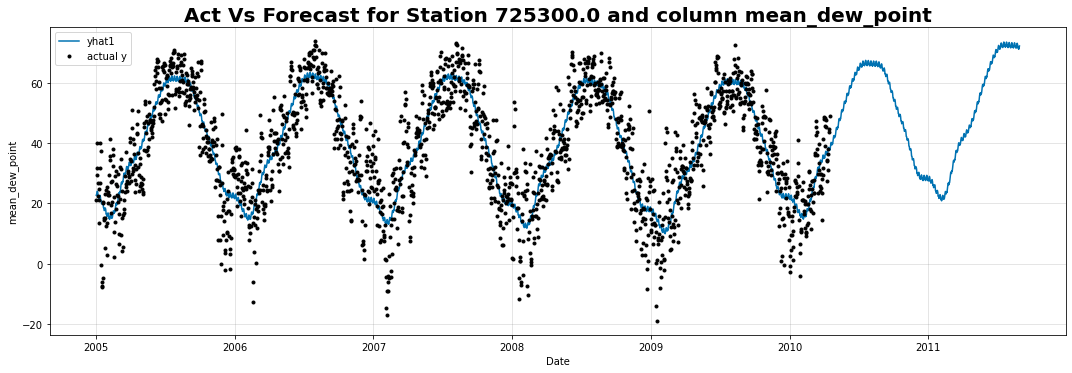

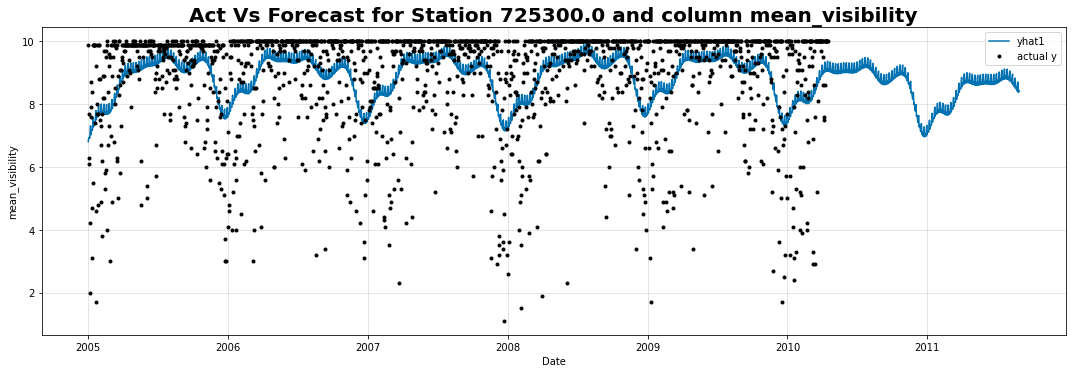

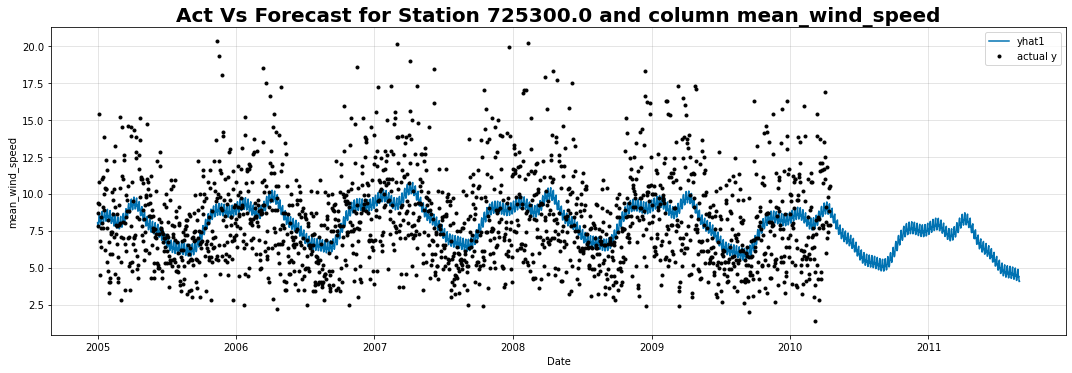

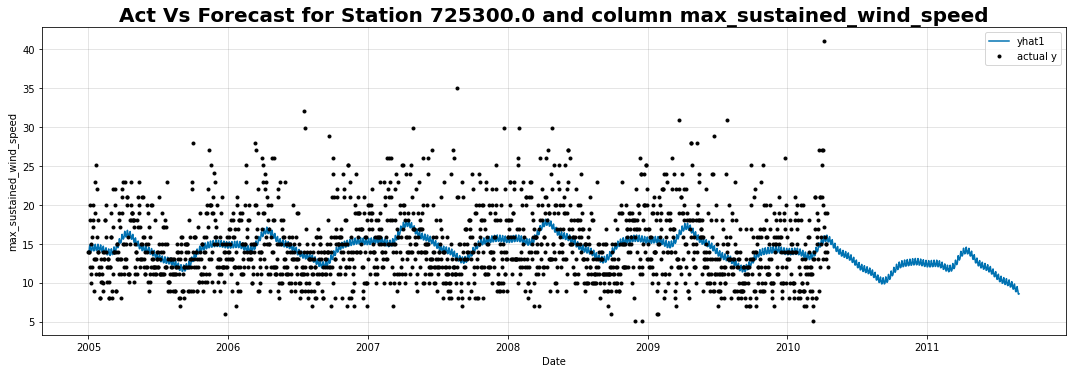

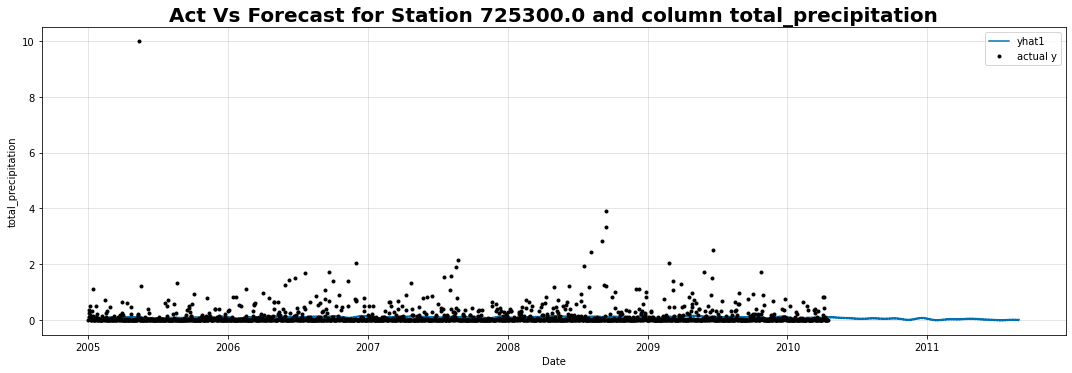

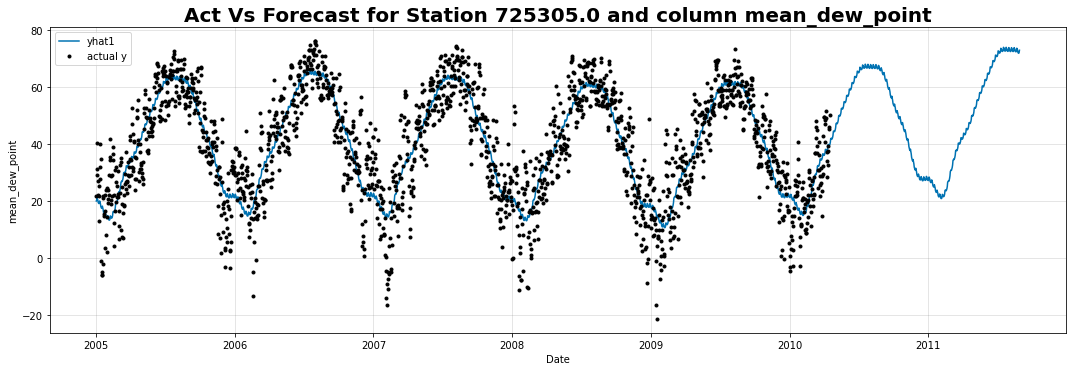

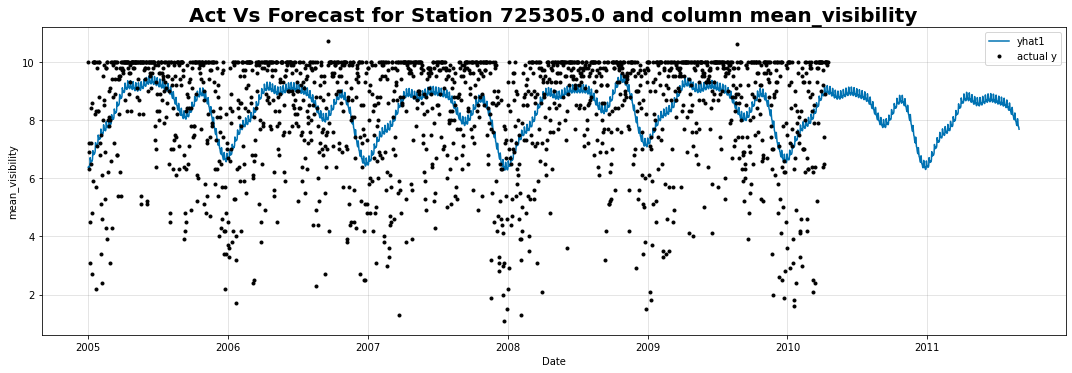

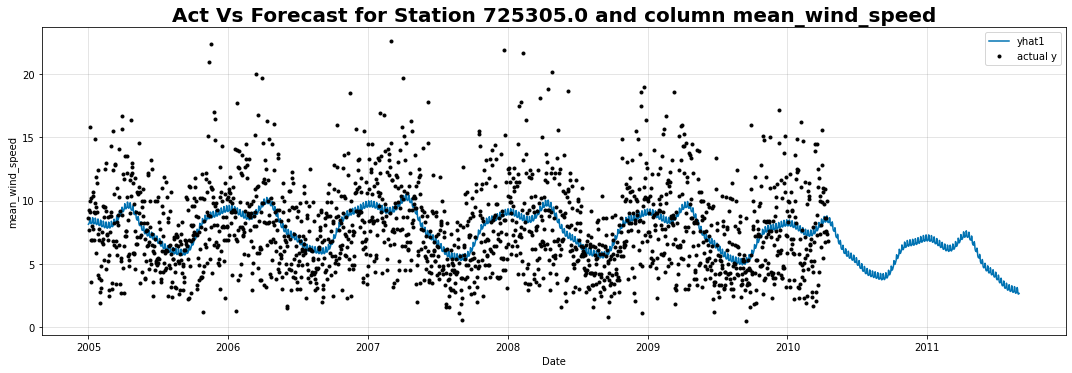

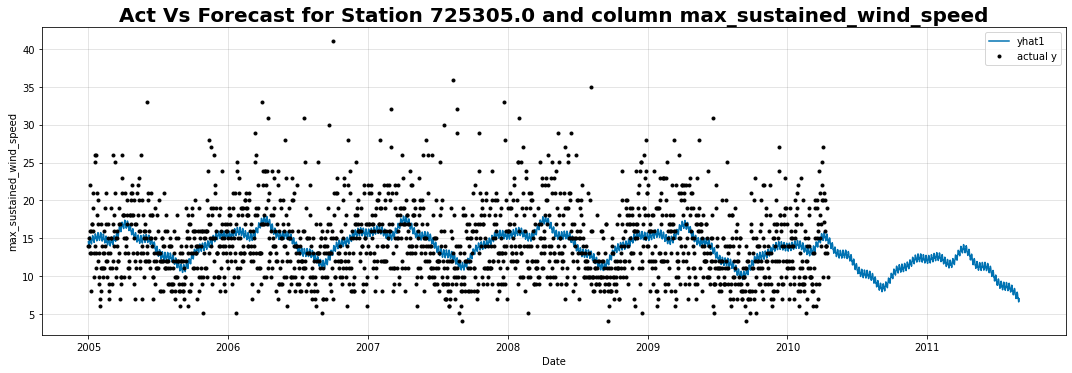

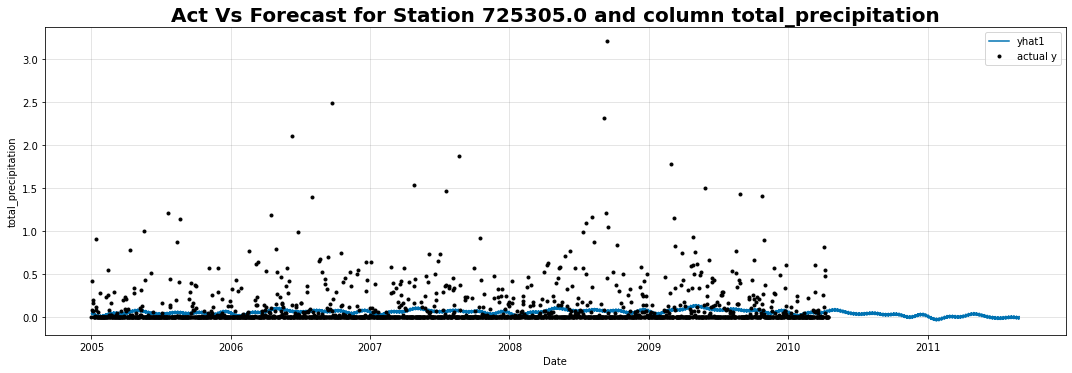

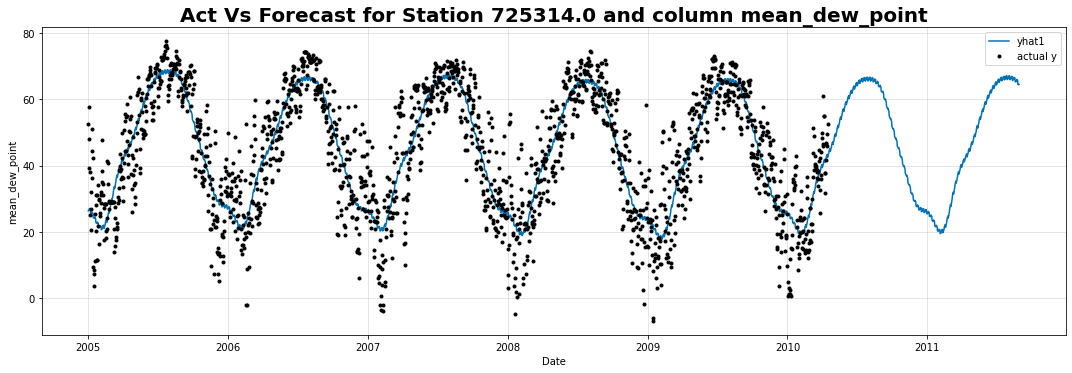

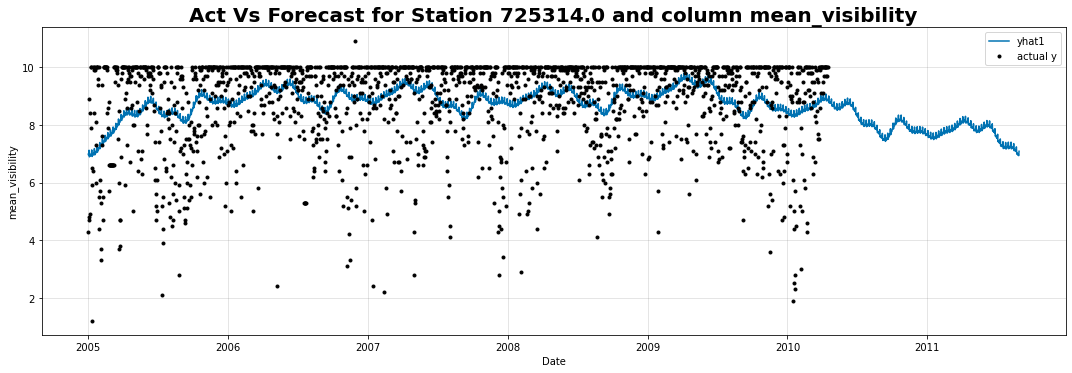

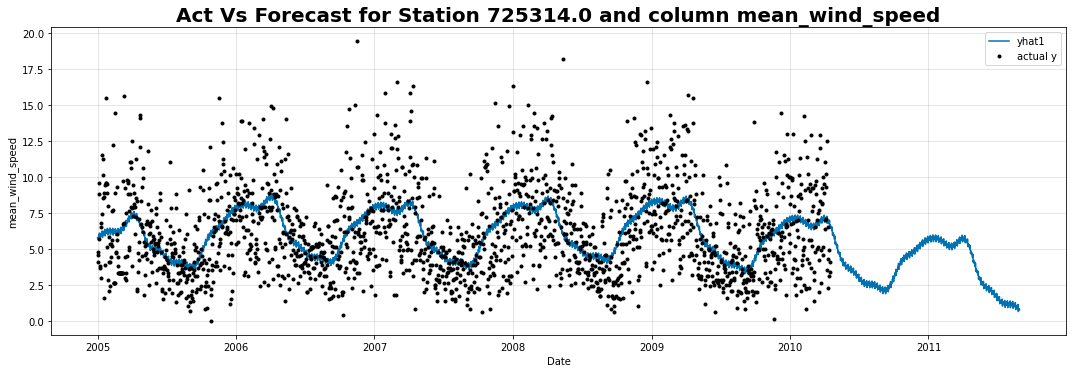

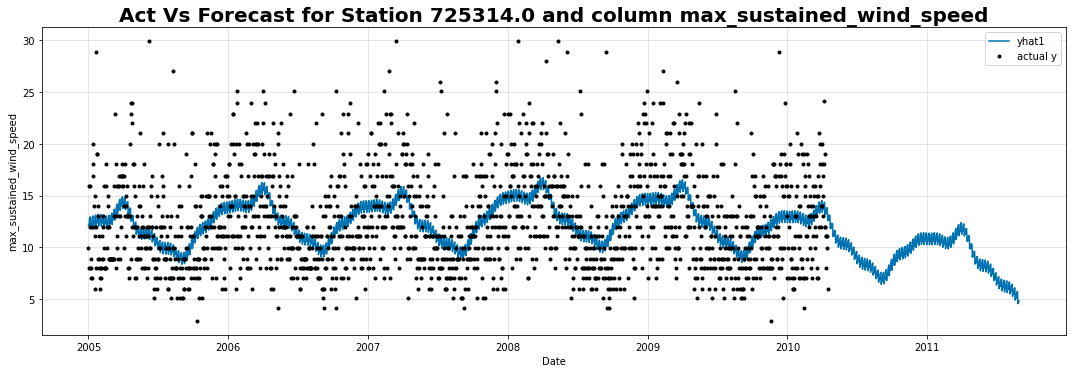

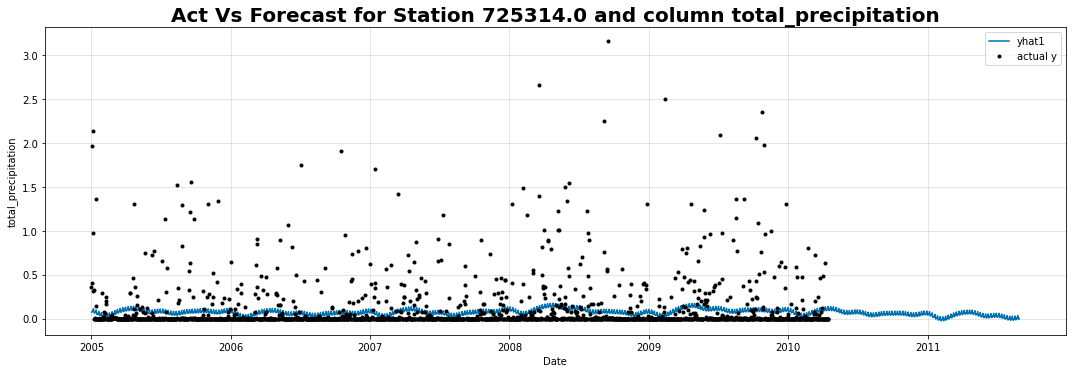

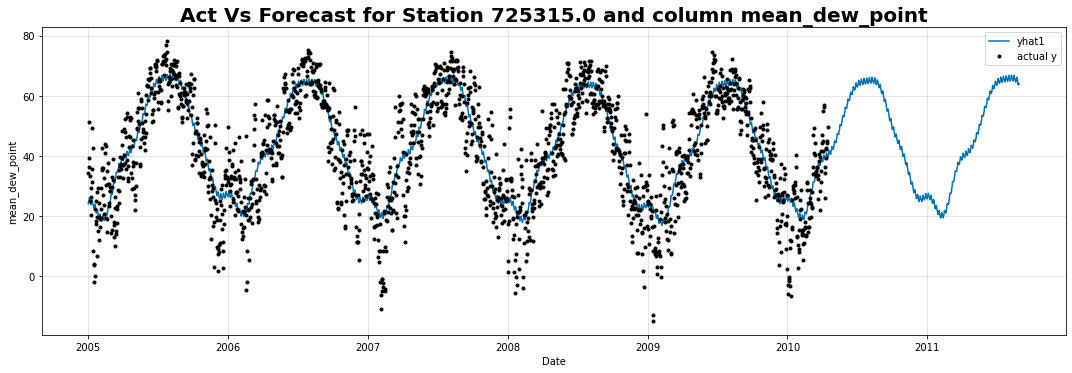

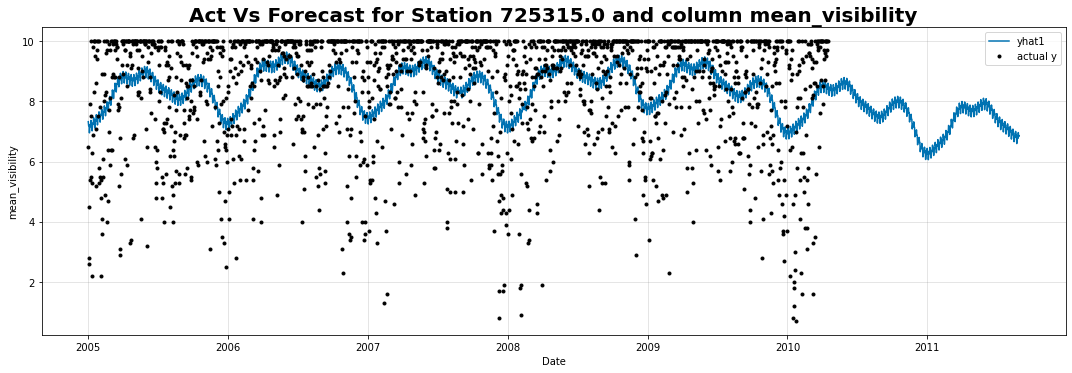

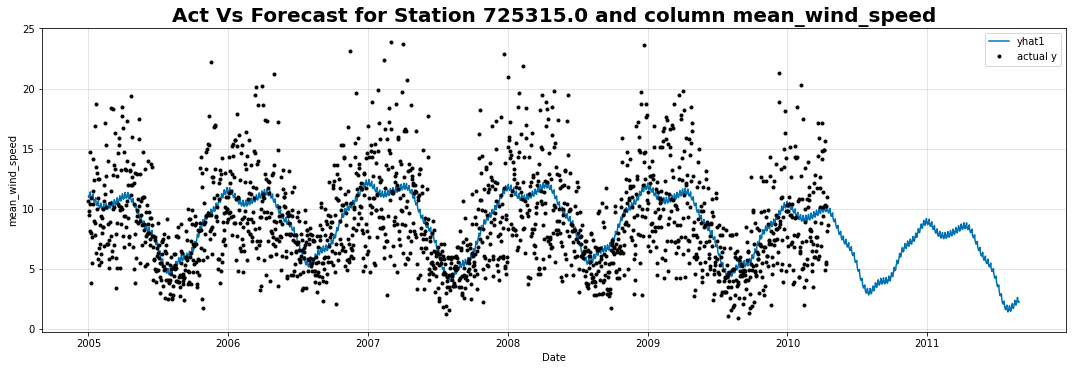

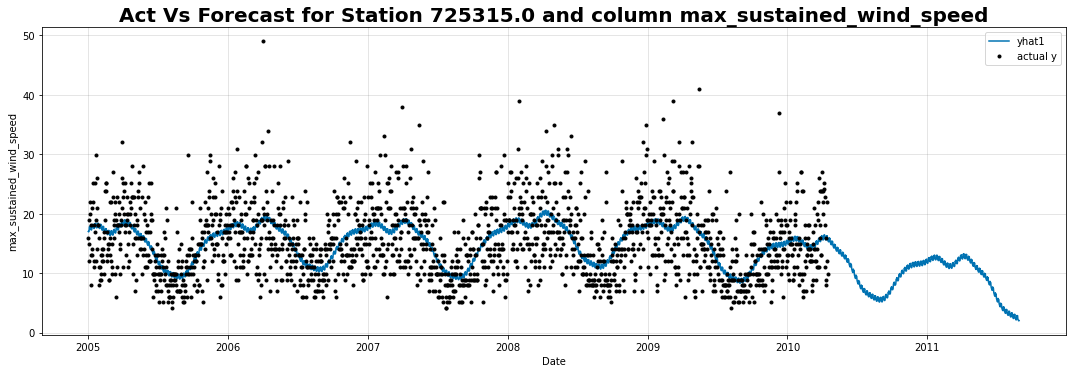

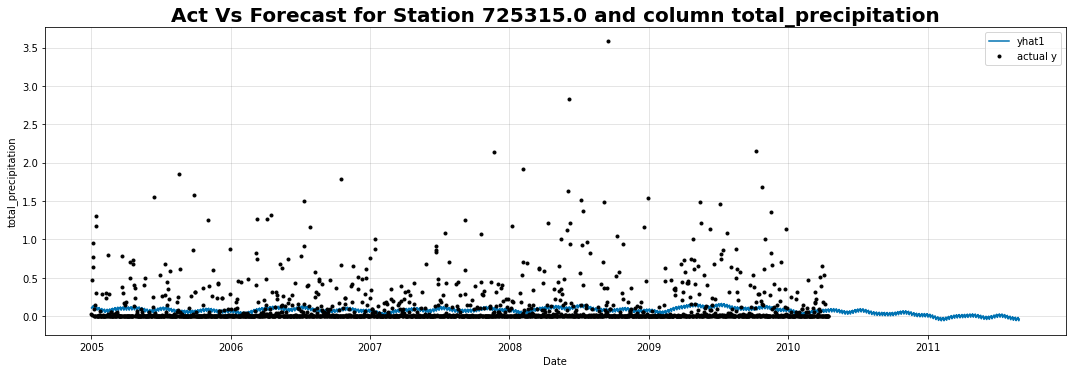

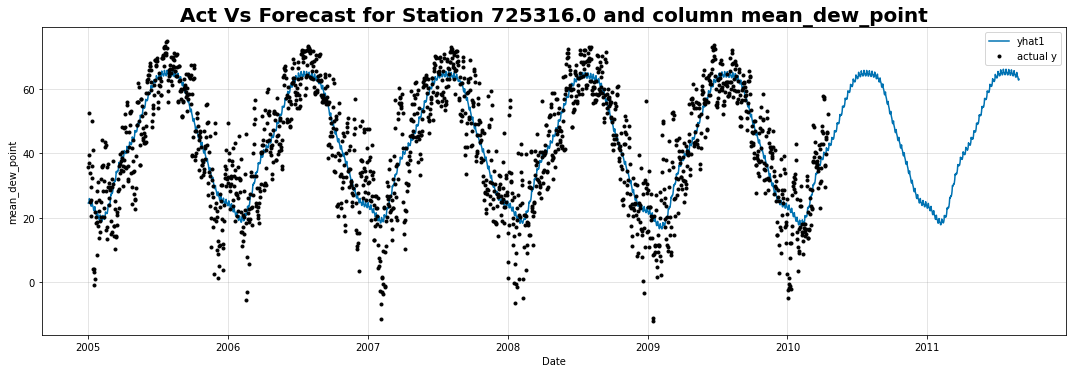

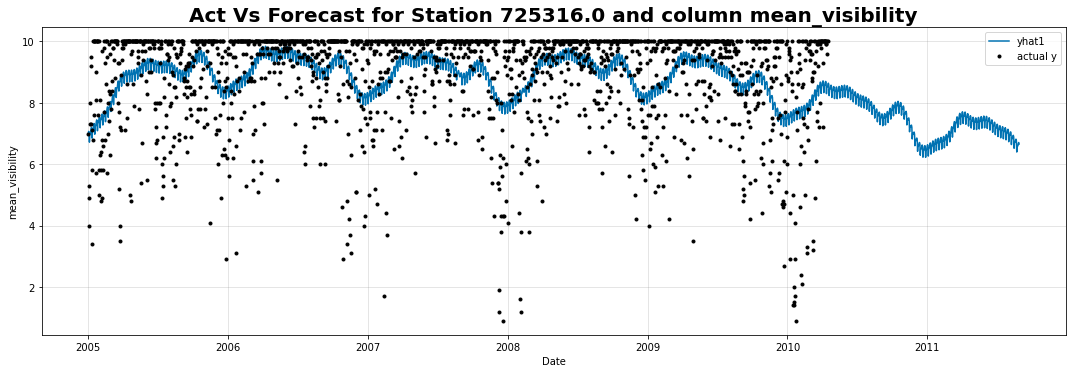

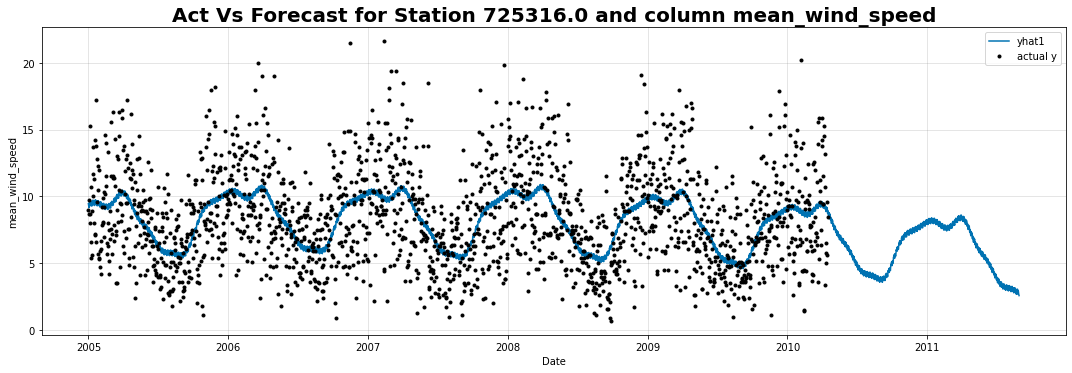

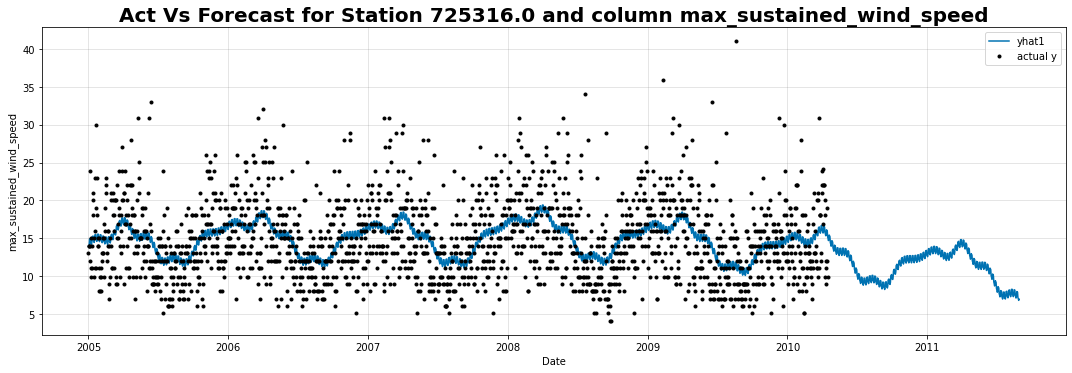

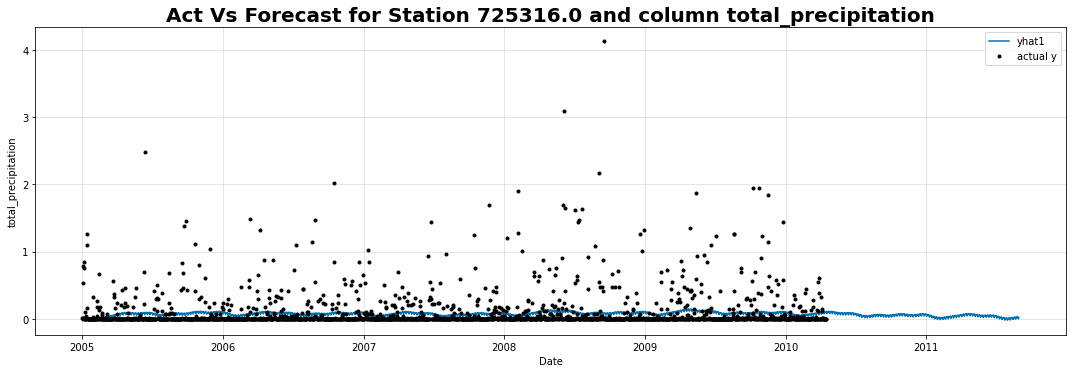

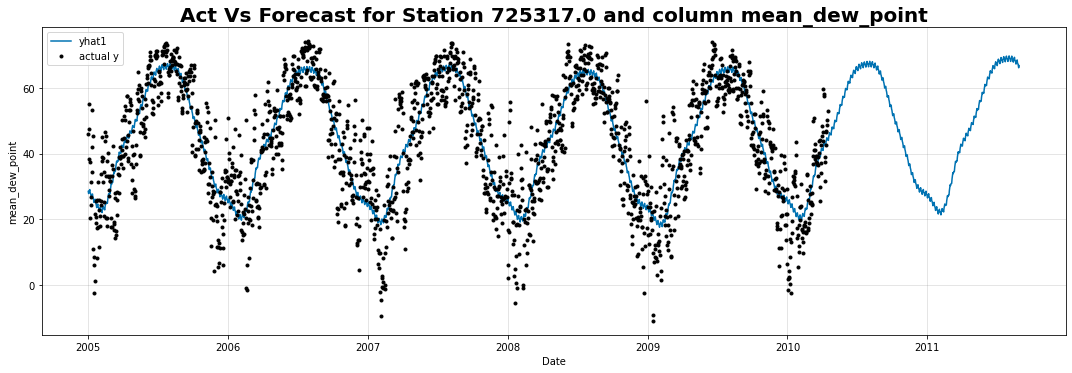

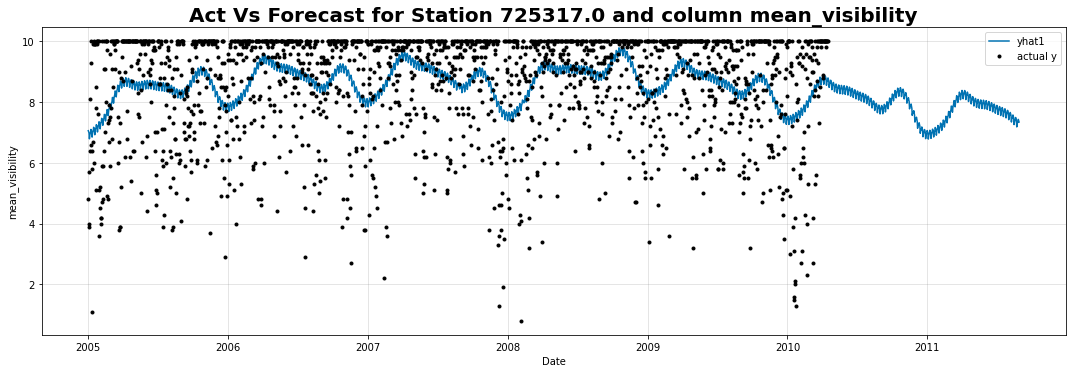

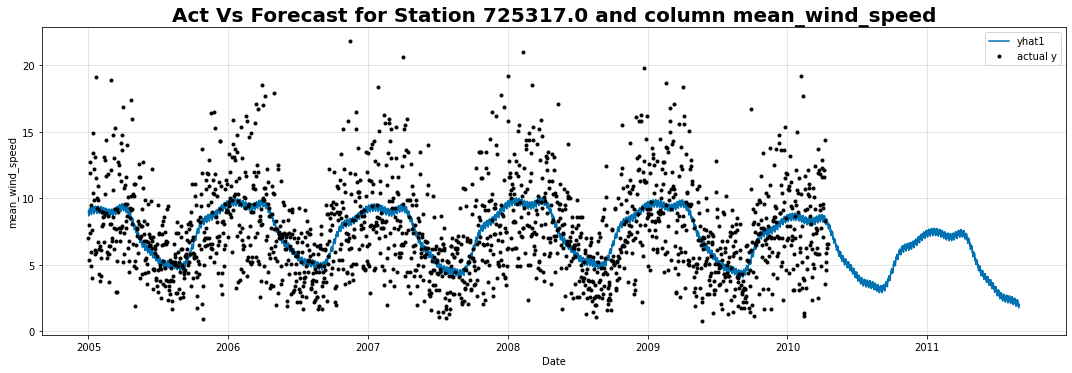

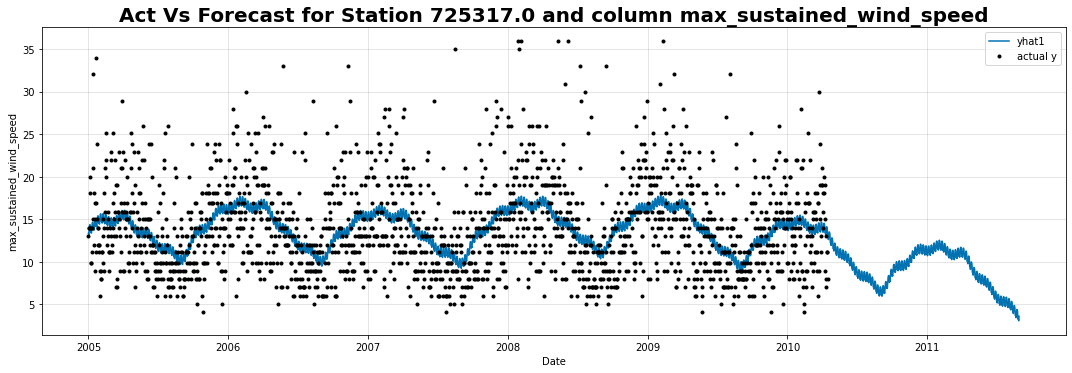

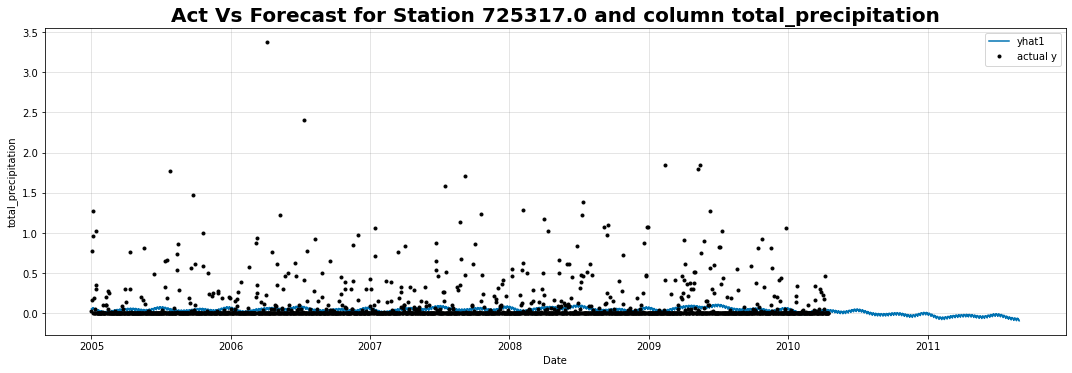

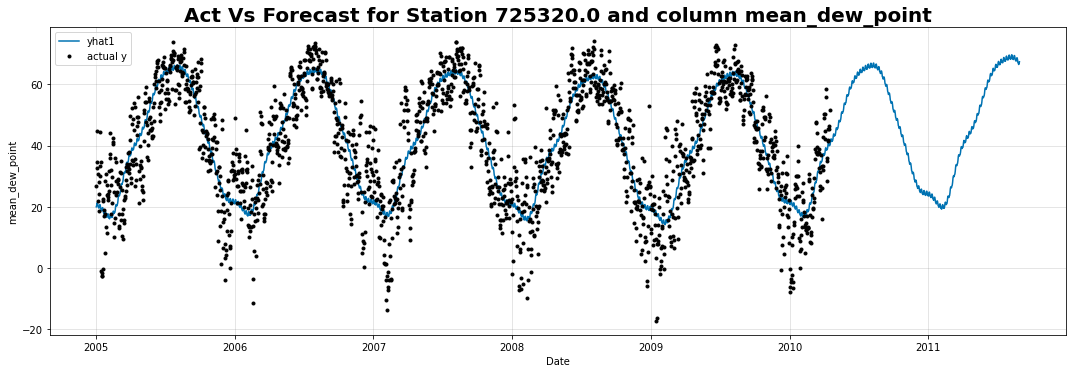

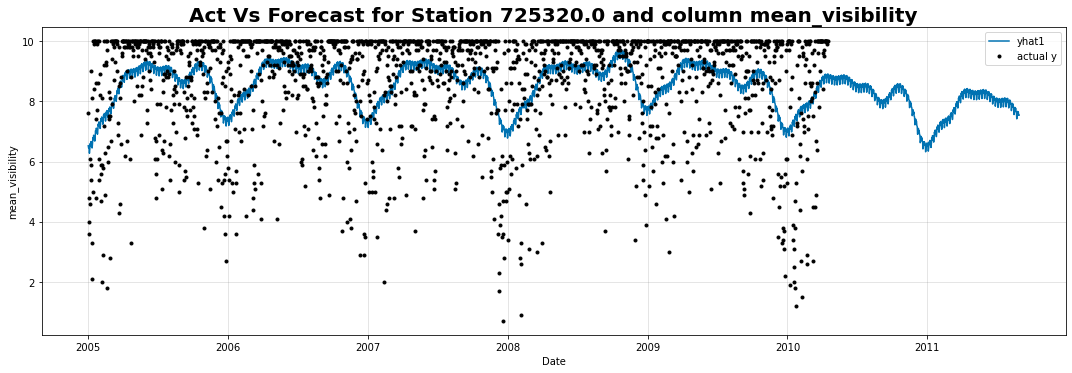

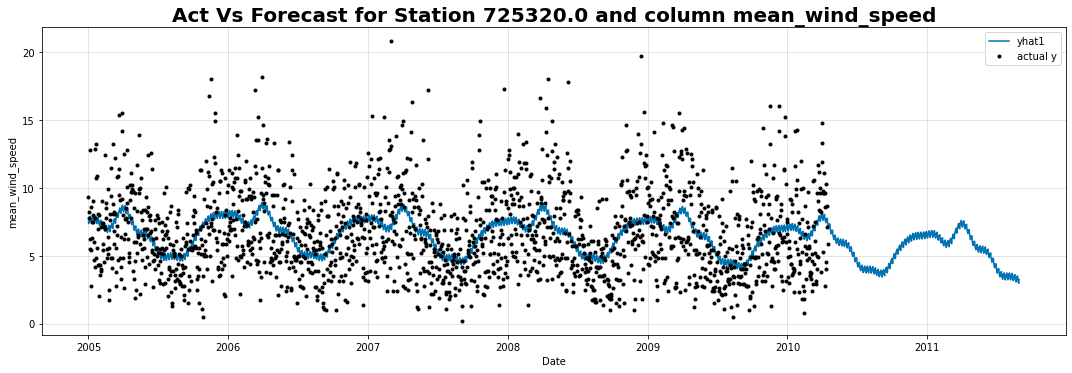

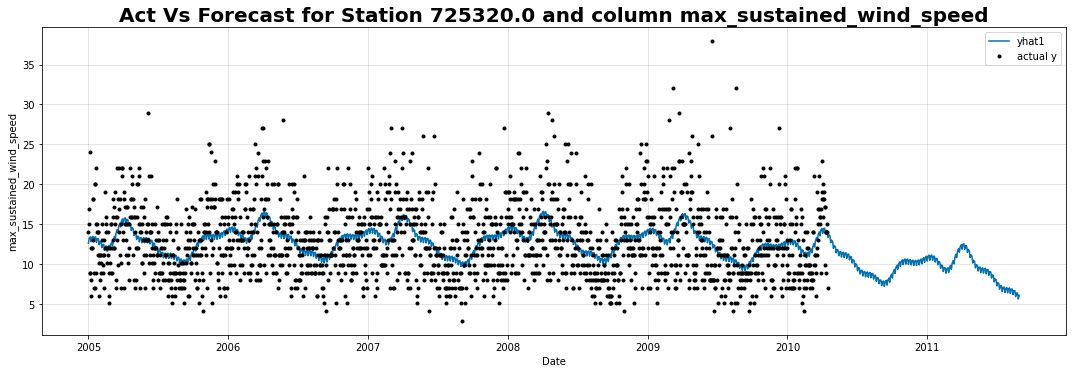

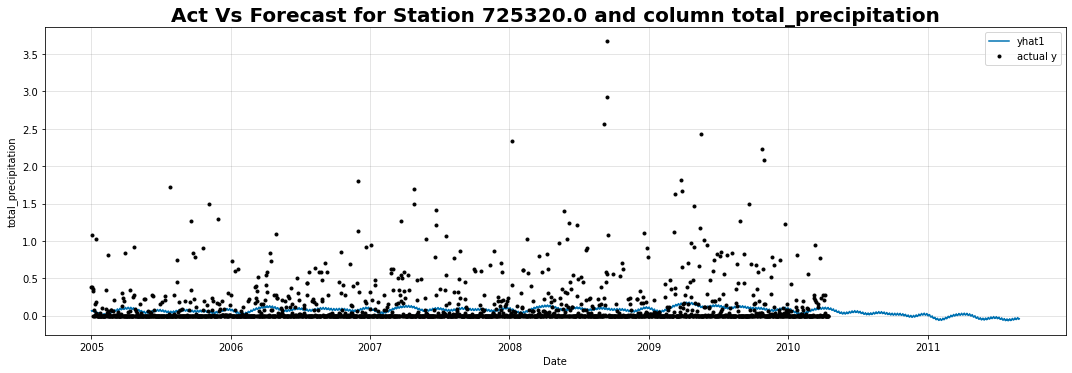

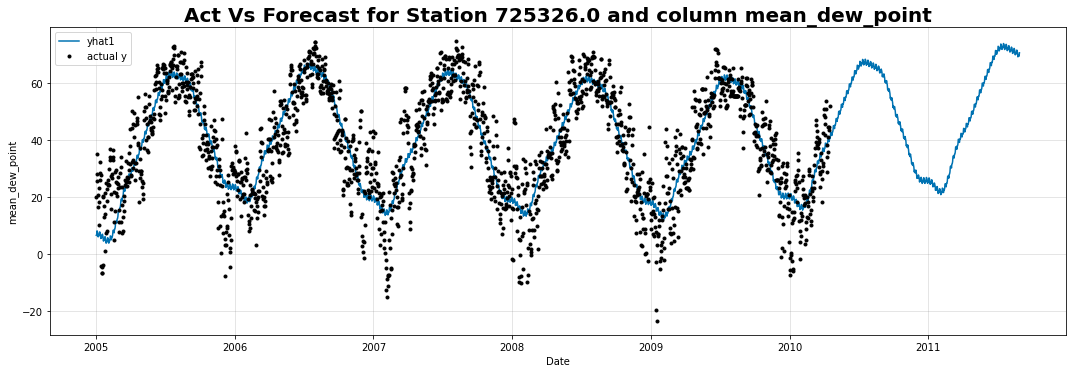

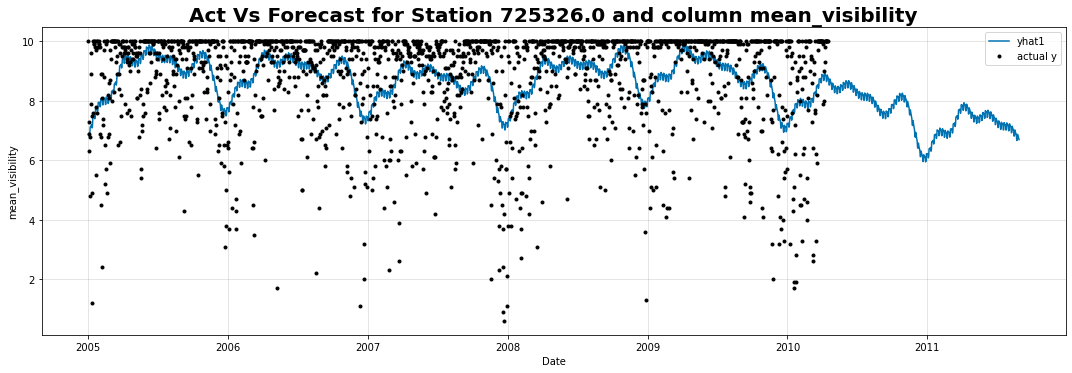

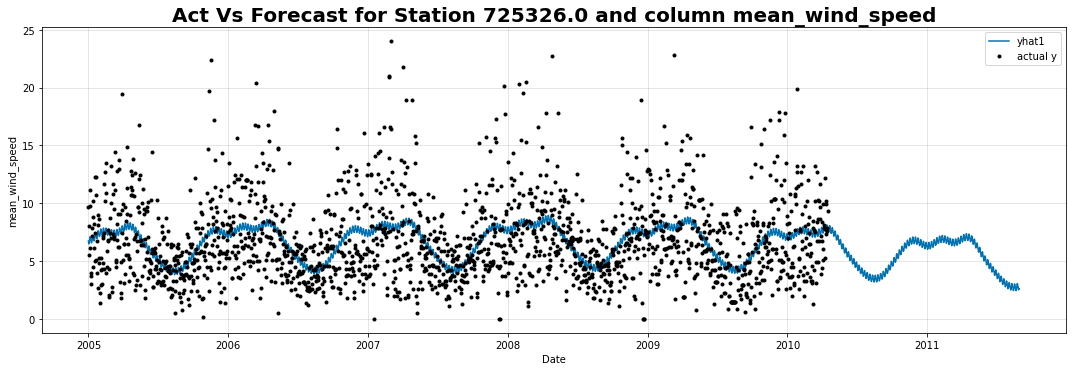

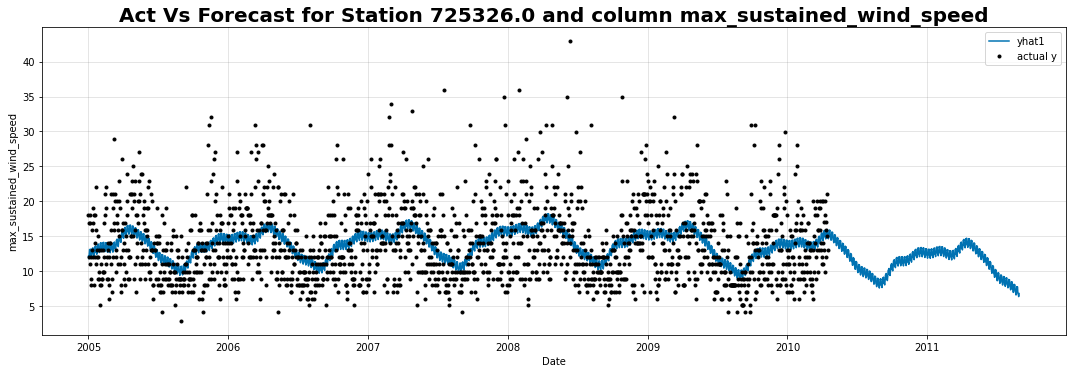

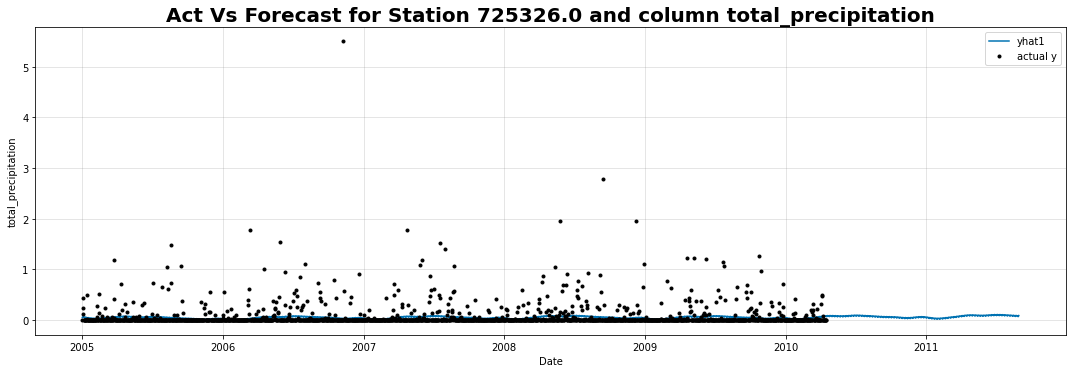

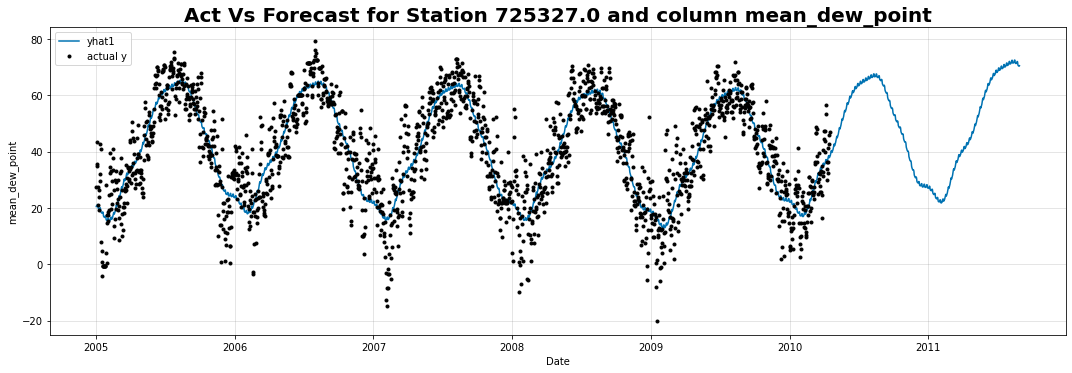

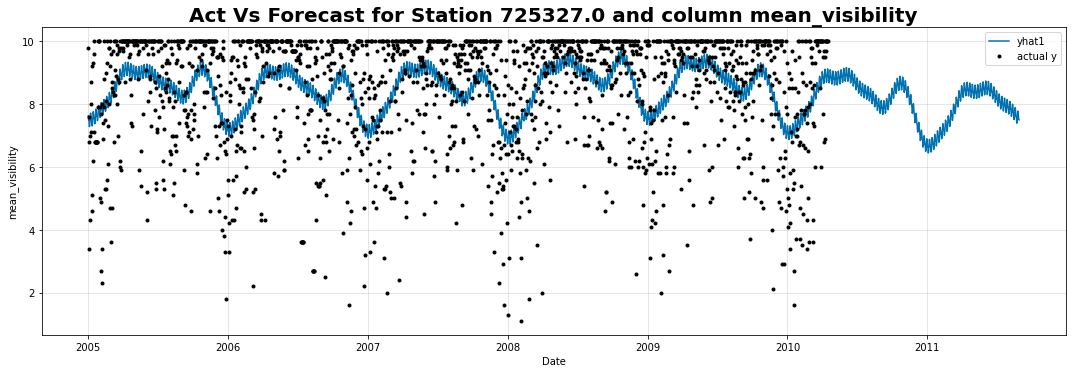

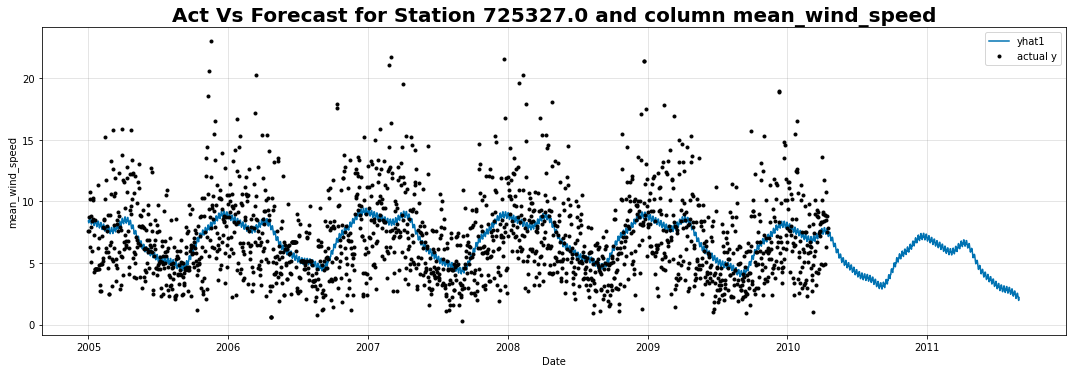

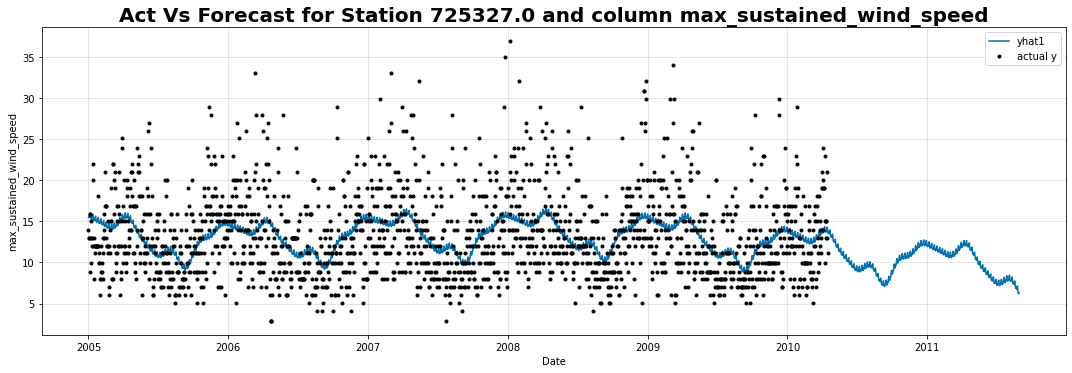

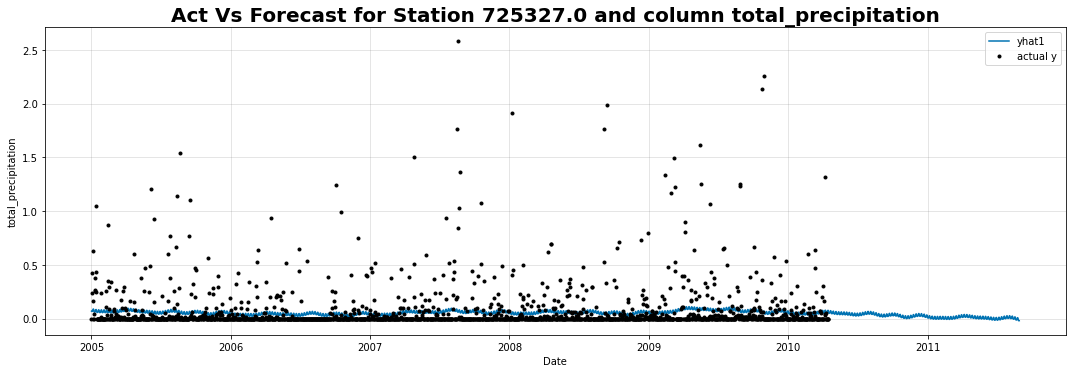

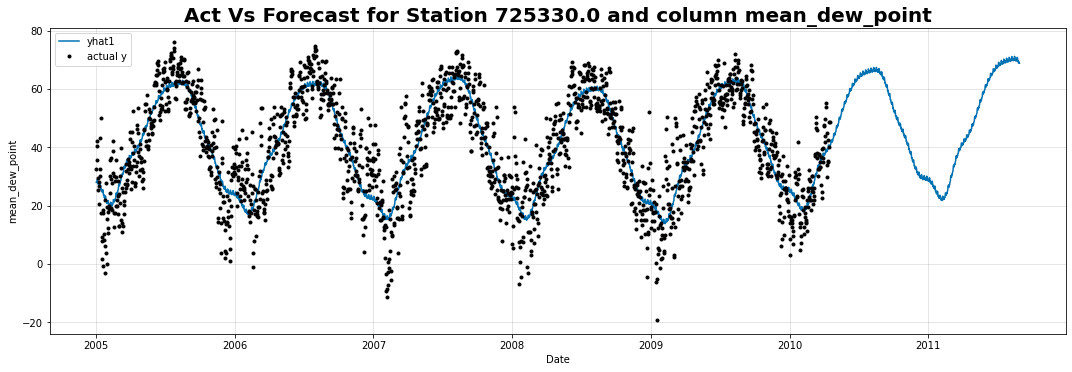

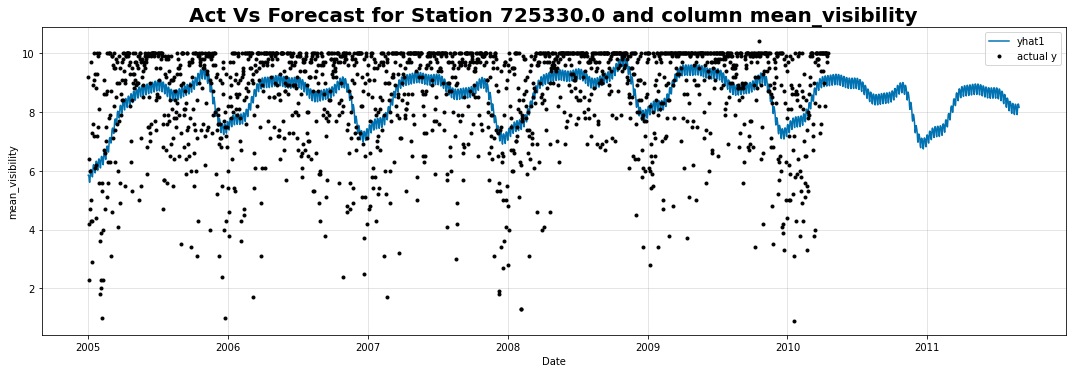

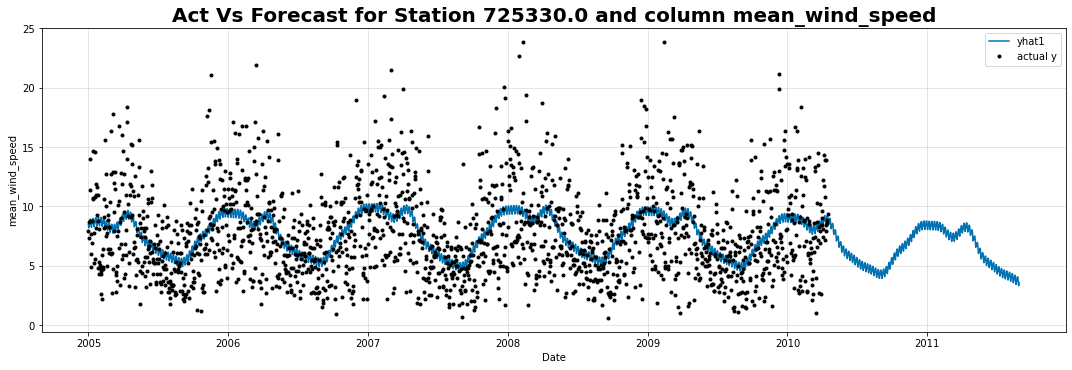

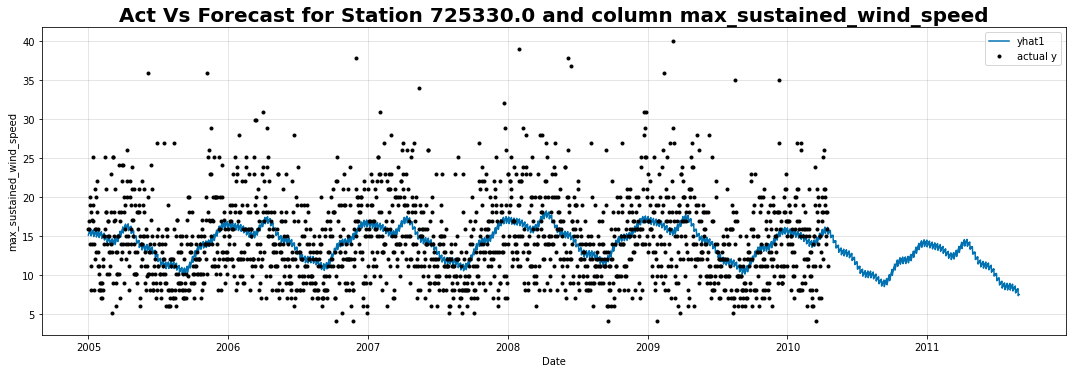

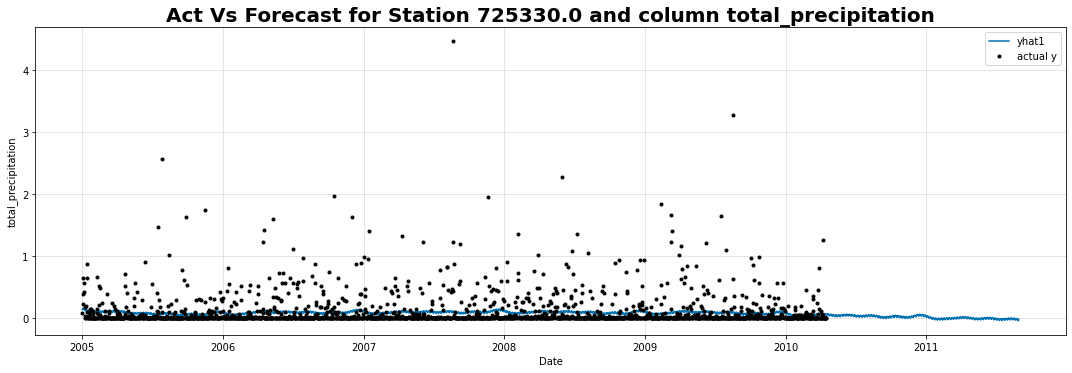

In [21]:
i=0
pred_df=pd.DataFrame()
for station in station_list:
    for col in col_pred_list:
        i=i+1
        print(i,"Station:",station,"----","Column Name:",col)
        
        # Preparing data for predictions for each station and continuous variable by date.
        new_column_df = concat_df_sub[concat_df_sub['station_number']==station][['date',col]] 
        new_column_df.columns = ['ds', 'y'] 
        
        # Model Fitting
        n = NeuralProphet(epochs = 20)
        model = n.fit(new_column_df, freq='D',progress="none")
        
        # Forecasting daily for next 500 days
        future = n.make_future_dataframe(new_column_df, periods=500,n_historic_predictions=True)
        forecast = n.predict(future)
        
        # Plotting actual vs forecast
        fig, ax = plt.subplots(figsize=(15, 5))
        n.plot(forecast,xlabel="Date", ylabel=col,ax=ax)
        ax.set_title("Act Vs Forecast for Station "+ str(station)+" and column "+col, fontsize=20, fontweight="bold")
        
        # Writing forecast to dataframe and appending for each station
        forecast['station_number']=station
        forecast['col_pred']=col
        forecast=forecast[['ds','station_number','yhat1','col_pred']]
        pred_df=pred_df.append(forecast)


##### Only chosing columns that has good alignment between actual and forecast based on above plots by station and all continuous variables.  Variables chosen are "mean_dew_point", "total_precipitation","mean_visibility"

In [22]:
"""Chose only the columns that has shown good performance """

pred_df_filt_columns=pred_df[pred_df['col_pred'].isin(['mean_dew_point','total_precipitation','mean_visibility'])]

"""Pivot the dataframe to get the column names of the continuous variables along columns so as to later use as the dataframe for prediction"""
pred_df_filt_columns_pivot=pd.pivot_table(pred_df_filt_columns,columns='col_pred',values='yhat1',index=['ds','station_number']).reset_index()

"""Renaming  the date column"""
pred_df_filt_columns_pivot.rename(columns = {'ds':'date'}, inplace = True)

"""Chose rows with date as  11 years ago from today"""
pred_df_filt_columns_pivot=pred_df_filt_columns_pivot[pred_df_filt_columns_pivot['date']==date_11_years_ago]


In [23]:
"""Get only the important variables even for the original dataframe which should be used for training and validation"""

df_train_val=concat_df[['date','station_number','mean_dew_point','total_precipitation','mean_visibility','snow']]


## Part 2
If you made it up to here all by yourself, you can use your prepared dataset to train an Algorithm of your choice to forecast whether it will snow on the following date for each station in this dataset:

You are allowed to use any library you are comfortable with such as sklearn, tensorflow keras etc. 
If you did not manage to finish part one feel free to use the data provided in 'coding_challenge.csv' Note that this data does not represent a solution to Part 1. 

In [24]:
import datetime, timedelta

str(datetime.datetime.today()- datetime.timedelta(days=11*365)).split(' ')[0]

'2011-07-30'

### Model fitting and prediction for each station using XGBoost and also did oversampling to solve the imbalance

In [26]:
forecast_df=pd.DataFrame([])
for station in station_list:
    print ("==============================================")
    
    """Preparing dataframes for the training, evaluation and prediction"""

    pred_station=pred_df_filt_columns_pivot[pred_df_filt_columns_pivot['station_number']==station]
    pred_station.drop(columns=['date','station_number'],inplace=True)
    df_filt=df_train_val[df_train_val['station_number']==station]
    X=df_filt.drop(columns=['date','snow','station_number'])
    Y=df_filt[['snow']]
    
    print('\033[1m',"Station:",station,'\033[0m')
    print('\033[1m',"_______",'\033[0m')
    
    """Splitting the dataframe between train and validation"""
    
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)
    print("Label Count Before Sampling:",pd.DataFrame(y_train['snow'].value_counts()).to_dict('dict'))
    
    """Performed Over sampling to solve the imbalance"""
    
    rus = RandomOverSampler(random_state=42,sampling_strategy=0.60)
    
    """Recreating the dataframes for training and validation after sampling"""
    
    if len(y_train['snow'].unique().tolist())==1:
        X_resampled, y_resampled = X_train, y_train
    else:
        rus.fit(X_train, y_train)
        X_resampled, y_resampled = rus.fit_resample(X_train, y_train)
        print("Label Count After Over Sampling:",pd.DataFrame(y_resampled['snow'].value_counts()).to_dict('dict'))
        
    
    """Model Fitting"""
    
    model = XGBClassifier()
    model.fit(X_resampled, y_resampled)
    y_pred = model.predict(X_test)
    
    """Preparing Confusion Matrix and Accuracy report"""
    
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    
    """Forecasting for each station for the date 11 years ago today"""
    
    y_pred = model.predict(pred_station)
    forecast_df=forecast_df.append({'station_number': station,'snow':y_pred[0]},ignore_index=True)
    print ("==============================================")

 Station: 725300.0 
 _______ 
Label Count Before Sampling: {'snow': {False: 1337, True: 207}}
Label Count After Over Sampling: {'snow': {False: 1337, True: 802}}
              precision    recall  f1-score   support

       False       0.98      0.90      0.94       365
        True       0.28      0.67      0.39        21

    accuracy                           0.89       386
   macro avg       0.63      0.78      0.67       386
weighted avg       0.94      0.89      0.91       386

[[329  36]
 [  7  14]]
 Station: 725305.0 
 _______ 
Label Count Before Sampling: {'snow': {False: 1343, True: 201}}
Label Count After Over Sampling: {'snow': {False: 1343, True: 805}}
              precision    recall  f1-score   support

       False       0.92      0.91      0.92       335
        True       0.46      0.51      0.48        51

    accuracy                           0.85       386
   macro avg       0.69      0.71      0.70       386
weighted avg       0.86      0.85      0.86       386


### Forecast for the day 11 years ago from today for all 10 station is as follows:

In [27]:
forecast_df

station_number  snow
0        725300.0   1.0
1        725305.0   1.0
2        725314.0   0.0
3        725315.0   1.0
4        725316.0   0.0
5        725317.0   1.0
6        725320.0   1.0
7        725326.0   0.0
8        725327.0   0.0
9        725330.0   1.0